Import the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas import GeoDataFrame
import seaborn as sns
from datetime import datetime
from datetime import date
import glob
import os
import matplotlib.pyplot as plt
import warnings

In [2]:
# Ignore warnings. This becomes important later in the code when all blank values have to be set to NAN
warnings.filterwarnings("ignore")

Step 1: Upload the fSCA pixel extraction data

In [63]:
# Change the working directory of the code
os.chdir('/Users/f67f911/Desktop/Bridger_snotels/')

Step 2: Upload the SNOTEL site data

In [66]:
# Set the path for the SNOTEL data
snotel_path = 'Data'

In [67]:
# Search the path and extract the snotel files 
snotel_files = glob.glob(snotel_path +'/*.csv')
snotel_files

['Data/Sacajawea_export.csv', 'Data/Brackett_export.csv']

In [6]:
# Create an empty list to hold all dataframes for the read in csv files
snotel_df_holder = []
# Create a for loop to cycle through all of the chena_files
for j in (snotel_files):
    # Create a new dataframe for each file
    df = pd.read_csv(j)
    # Change list of lists to a dataframe
    df = pd.DataFrame(df)
    station = os.path.basename(j)
    station = os.path.splitext(station)[0]
    station = station.replace('_export', '')
    # Create a new column in the dataframe to hold the year values
    df['station'] = station
    
    # Append the list of df_holder with all of the values for the individual dataframes
    snotel_df_holder.append(df)
    #snotel_df_holder = pd.DataFrame()
    snotel_df_holder
# Create a new dataframe that contains all of the dataframes created in the above loop
snotel_data_df = pd.concat(snotel_df_holder, axis = 0, ignore_index = False, join = 'outer')
# Create a new column titled 'Year' to hold the year derived from the datetime column
snotel_data_df['Year'] =  pd.DatetimeIndex(snotel_data_df['datetime']).year.astype(int)
# Do the same as above, but with Months
snotel_data_df['Month'] =  pd.DatetimeIndex(snotel_data_df['datetime']).month.astype(int)
# Change the format so that we only display year-month-day
snotel_data_df['datetime'] = pd.to_datetime(snotel_data_df['datetime']).dt.strftime('%Y-%m-%d')
# Check the dataframe to make sure the data has been read in correctly
snotel_data_df.head()

,datetime,Daily Precipitation (mm),Daily Snow Depth (cm),Daily Average Temperature (F),Daily Maximum Temperature (F),Daily Minimum Temperature (F),Daily Water Equivalent (cm),station,Year,Month
0,1999-09-30,NaN,NaN,37.76,43.34,32.00,NaN,Sacajawea,1999,9
1,1999-10-01,0.0,NaN,35.60,47.30,28.58,0.0,Sacajawea,1999,10
2,1999-10-02,0.0,NaN,28.40,31.64,24.62,0.0,Sacajawea,1999,10
3,1999-10-03,0.0,NaN,41.54,50.72,22.46,0.0,Sacajawea,1999,10
4,1999-10-04,0.0,NaN,50.54,61.16,36.86,0.0,Sacajawea,1999,10


In [7]:
# Make sure the datetime column is correctly identified as a pandas datetime with the format year-month-day
snotel_data_df['datetime'] = pd.to_datetime(snotel_data_df['datetime']).dt.strftime('%Y-%m-%d')
# Create a column to hold the 'Month' variable
snotel_data_df['Month'] =  pd.DatetimeIndex(snotel_data_df['datetime']).month.astype(int)
# Sort the dataframe by ascending date
snotel_data_df = snotel_data_df.sort_values(by = 'datetime', ascending = True)
# Check the dataframe and the datetime column to make sure this was done correctly
snotel_data_df.head()

,datetime,Daily Precipitation (mm),Daily Snow Depth (cm),Daily Average Temperature (F),Daily Maximum Temperature (F),Daily Minimum Temperature (F),Daily Water Equivalent (cm),station,Year,Month
0,1994-09-29,NaN,NaN,47.30,55.40,42.80,NaN,Brackett,1994,9
1,1994-09-30,NaN,NaN,46.04,53.06,40.82,NaN,Brackett,1994,9
2,1994-10-01,0.5,NaN,48.20,63.14,34.34,0.0,Brackett,1994,10
3,1994-10-02,0.0,NaN,27.86,36.14,19.22,0.0,Brackett,1994,10
4,1994-10-03,0.1,NaN,21.20,23.72,16.88,0.0,Brackett,1994,10


In [8]:
# And now check for the Willow
print(snotel_data_df['station'].unique())

['Brackett' 'Sacajawea']


## Step 3: Create Visualizations for the Data

### Start with some time series visualizations 

Look at time series representations of fSCA

In [9]:
snotel_data_df

,datetime,Daily Precipitation (mm),Daily Snow Depth (cm),Daily Average Temperature (F),Daily Maximum Temperature (F),Daily Minimum Temperature (F),Daily Water Equivalent (cm),station,Year,Month
0,1994-09-29,NaN,NaN,47.30,55.40,42.80,NaN,Brackett,1994,9
1,1994-09-30,NaN,NaN,46.04,53.06,40.82,NaN,Brackett,1994,9
2,1994-10-01,0.5,NaN,48.20,63.14,34.34,0.0,Brackett,1994,10
3,1994-10-02,0.0,NaN,27.86,36.14,19.22,0.0,Brackett,1994,10
4,1994-10-03,0.1,NaN,21.20,23.72,16.88,0.0,Brackett,1994,10
...,...,...,...,...,...,...,...,...,...,...
10182,2022-08-15,0.0,0.0,65.66,77.54,55.04,0.0,Brackett,2022,8
10183,2022-08-16,NaN,0.0,68.18,82.58,55.76,0.0,Brackett,2022,8
8356,2022-08-16,0.0,0.0,64.94,82.94,47.48,0.0,Sacajawea,2022,8
8357,2022-08-17,NaN,NaN,NaN,NaN,NaN,0.0,Sacajawea,2022,8


In [36]:
snotel_data_df['DOY'] = pd.to_datetime(snotel_data_df['datetime']).dt.strftime('%m-%d')
snotel_data_df

,datetime,Daily Precipitation (mm),Daily Snow Depth (cm),Daily Average Temperature (F),Daily Maximum Temperature (F),Daily Minimum Temperature (F),Daily Water Equivalent (cm),station,Year,Month,DOY
0,1994-09-29,NaN,NaN,47.30,55.40,42.80,NaN,Brackett,1994,9,09-29
1,1994-09-30,NaN,NaN,46.04,53.06,40.82,NaN,Brackett,1994,9,09-30
2,1994-10-01,0.5,NaN,48.20,63.14,34.34,0.0,Brackett,1994,10,10-01
3,1994-10-02,0.0,NaN,27.86,36.14,19.22,0.0,Brackett,1994,10,10-02
4,1994-10-03,0.1,NaN,21.20,23.72,16.88,0.0,Brackett,1994,10,10-03
...,...,...,...,...,...,...,...,...,...,...,...
10182,2022-08-15,0.0,0.0,65.66,77.54,55.04,0.0,Brackett,2022,8,08-15
10183,2022-08-16,NaN,0.0,68.18,82.58,55.76,0.0,Brackett,2022,8,08-16
8356,2022-08-16,0.0,0.0,64.94,82.94,47.48,0.0,Sacajawea,2022,8,08-16
8357,2022-08-17,NaN,NaN,NaN,NaN,NaN,0.0,Sacajawea,2022,8,08-17


## Now let's look at the SNOTEL data

In [10]:
snotel_pivot1 = pd.pivot_table(snotel_data_df,
                          values='Daily Snow Depth (cm)',
                          index='station',
                          columns='Year')
# Set the index by the station name
snotel_pivot1 = snotel_pivot1.reindex(index = ['Brackett','Sacajawea'])
# Create a new column for the mean values across all years!
snotel_pivot1['Mean'] = snotel_pivot1.mean(axis = 1)
# Check to make sure it is correct!
snotel_pivot1

Year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Mean
station,,,,,,,,,,,,,,,,,,,,,
Brackett,4.794872,23.569863,17.644809,21.961644,20.736986,14.731507,26.142077,25.758904,27.50137,32.021918,...,32.057534,23.591781,19.374317,21.989041,32.983562,28.463014,24.904372,21.473973,24.973799,23.293012
Sacajawea,3.545455,15.509589,12.428962,13.936986,13.260274,9.331507,15.374317,15.764384,18.40000,20.865753,...,20.558904,13.684932,11.983607,12.378082,20.791781,17.912329,15.103825,11.682192,10.785088,14.252946


Text(0.5, 162.24999999999997, 'Year')

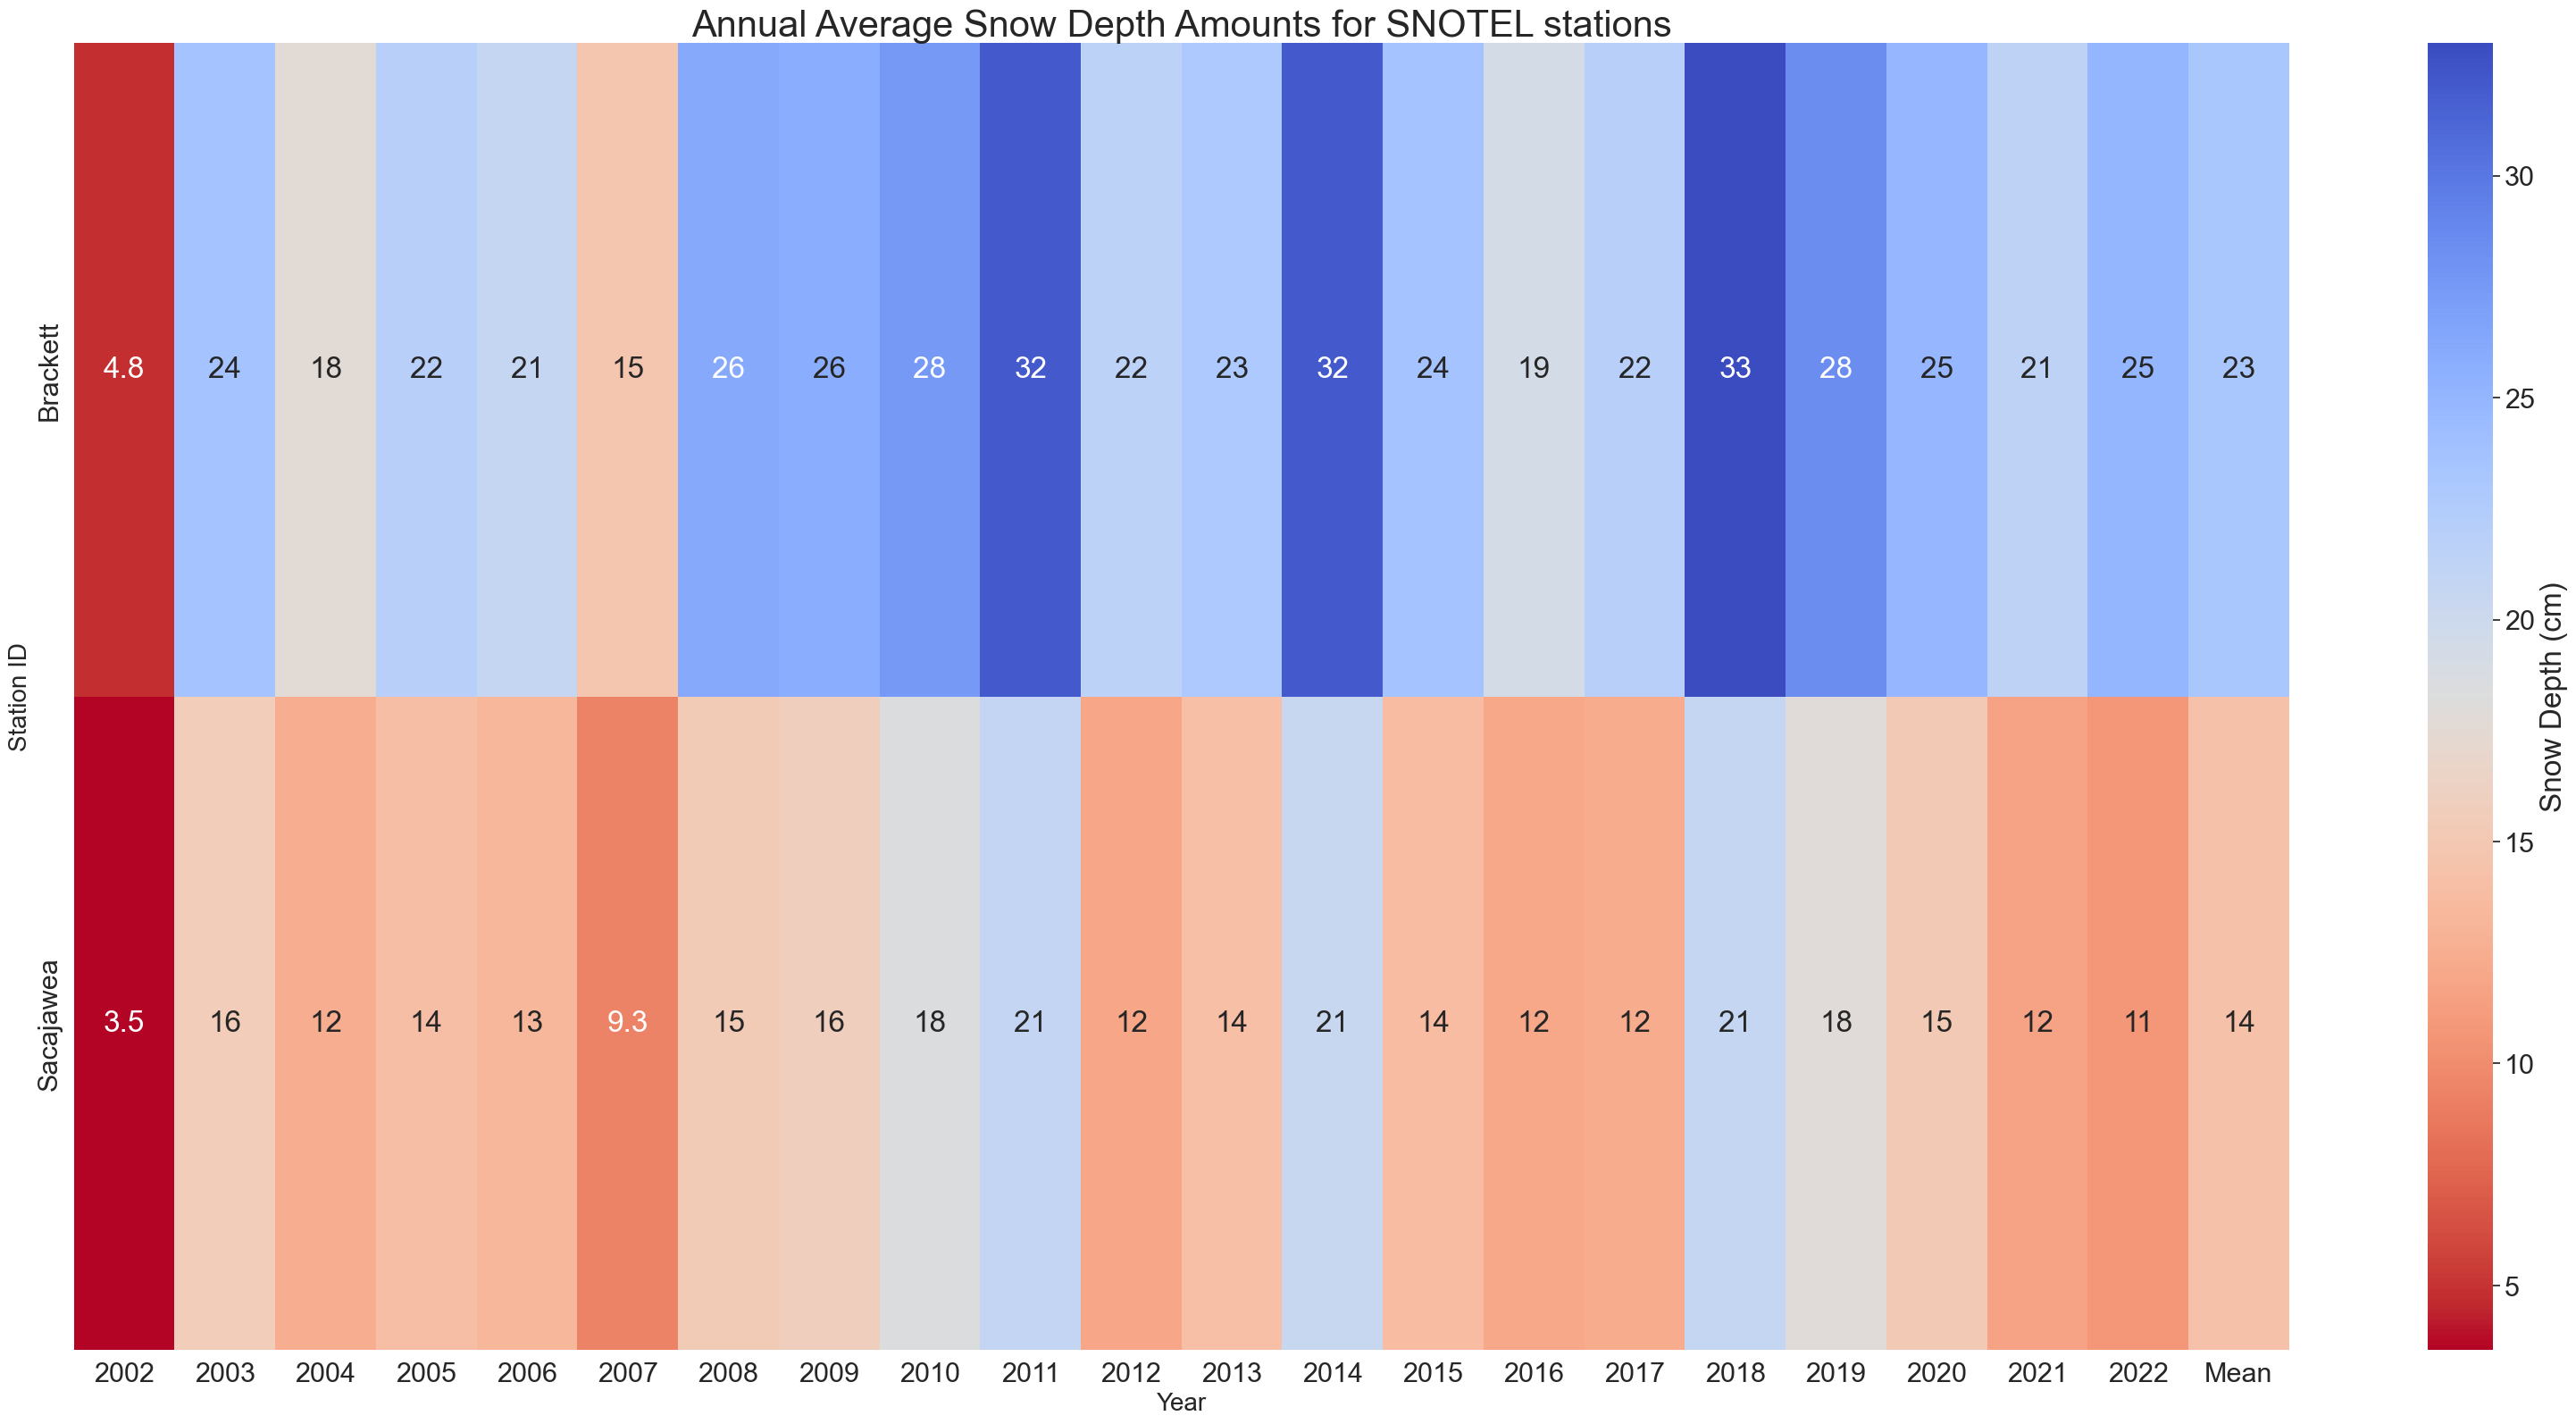

In [11]:
# Set image parameters
plt.figure(figsize = (40,19))
sns.set(font_scale=2)
# Set the plot title
plt.title('Annual Average Snow Depth Amounts for SNOTEL stations', fontsize = 30)
# Create a new heatmap for the mean fSCA across all years for each station
avg_fSCA_heat = sns.heatmap(snotel_pivot1, annot=True, cmap='coolwarm_r', fmt= '.2g', cbar_kws = {'label':'Snow Depth (cm)'})

plt.ylabel('Station ID', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
# avg_fSCA_heat.show()

#plt.savefig('Avgsnowdepth_station.png', bbox_inches='tight')

In [12]:
snotel_pivot2 = pd.pivot_table(snotel_data_df,
                          values='Daily Water Equivalent (cm)',
                          index='station',
                          columns='Year')
# Set the index by the station name
snotel_pivot2 = snotel_pivot2.reindex(index = ['Brackett','Sacajawea'])
# Create a new column for the mean values across all years!
snotel_pivot2['Mean'] = snotel_pivot2.mean(axis = 1)
# Check to make sure it is correct!
snotel_pivot2

Year,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Mean
station,,,,,,,,,,,,,,,,,,,,,
Brackett,4.186957,8.992055,10.589071,12.218082,6.000274,8.107397,5.996995,5.277534,7.711233,7.696164,...,10.946301,7.948219,6.148634,7.010411,11.502466,9.290685,7.919672,6.604384,8.297380,7.770400
Sacajawea,NaN,NaN,NaN,NaN,NaN,1.444565,3.617760,3.428767,4.187397,4.720822,...,6.810137,4.222466,3.717213,3.485479,6.847123,5.626575,4.648087,3.433151,3.267249,4.286065


Text(0.5, 162.24999999999997, 'Year')

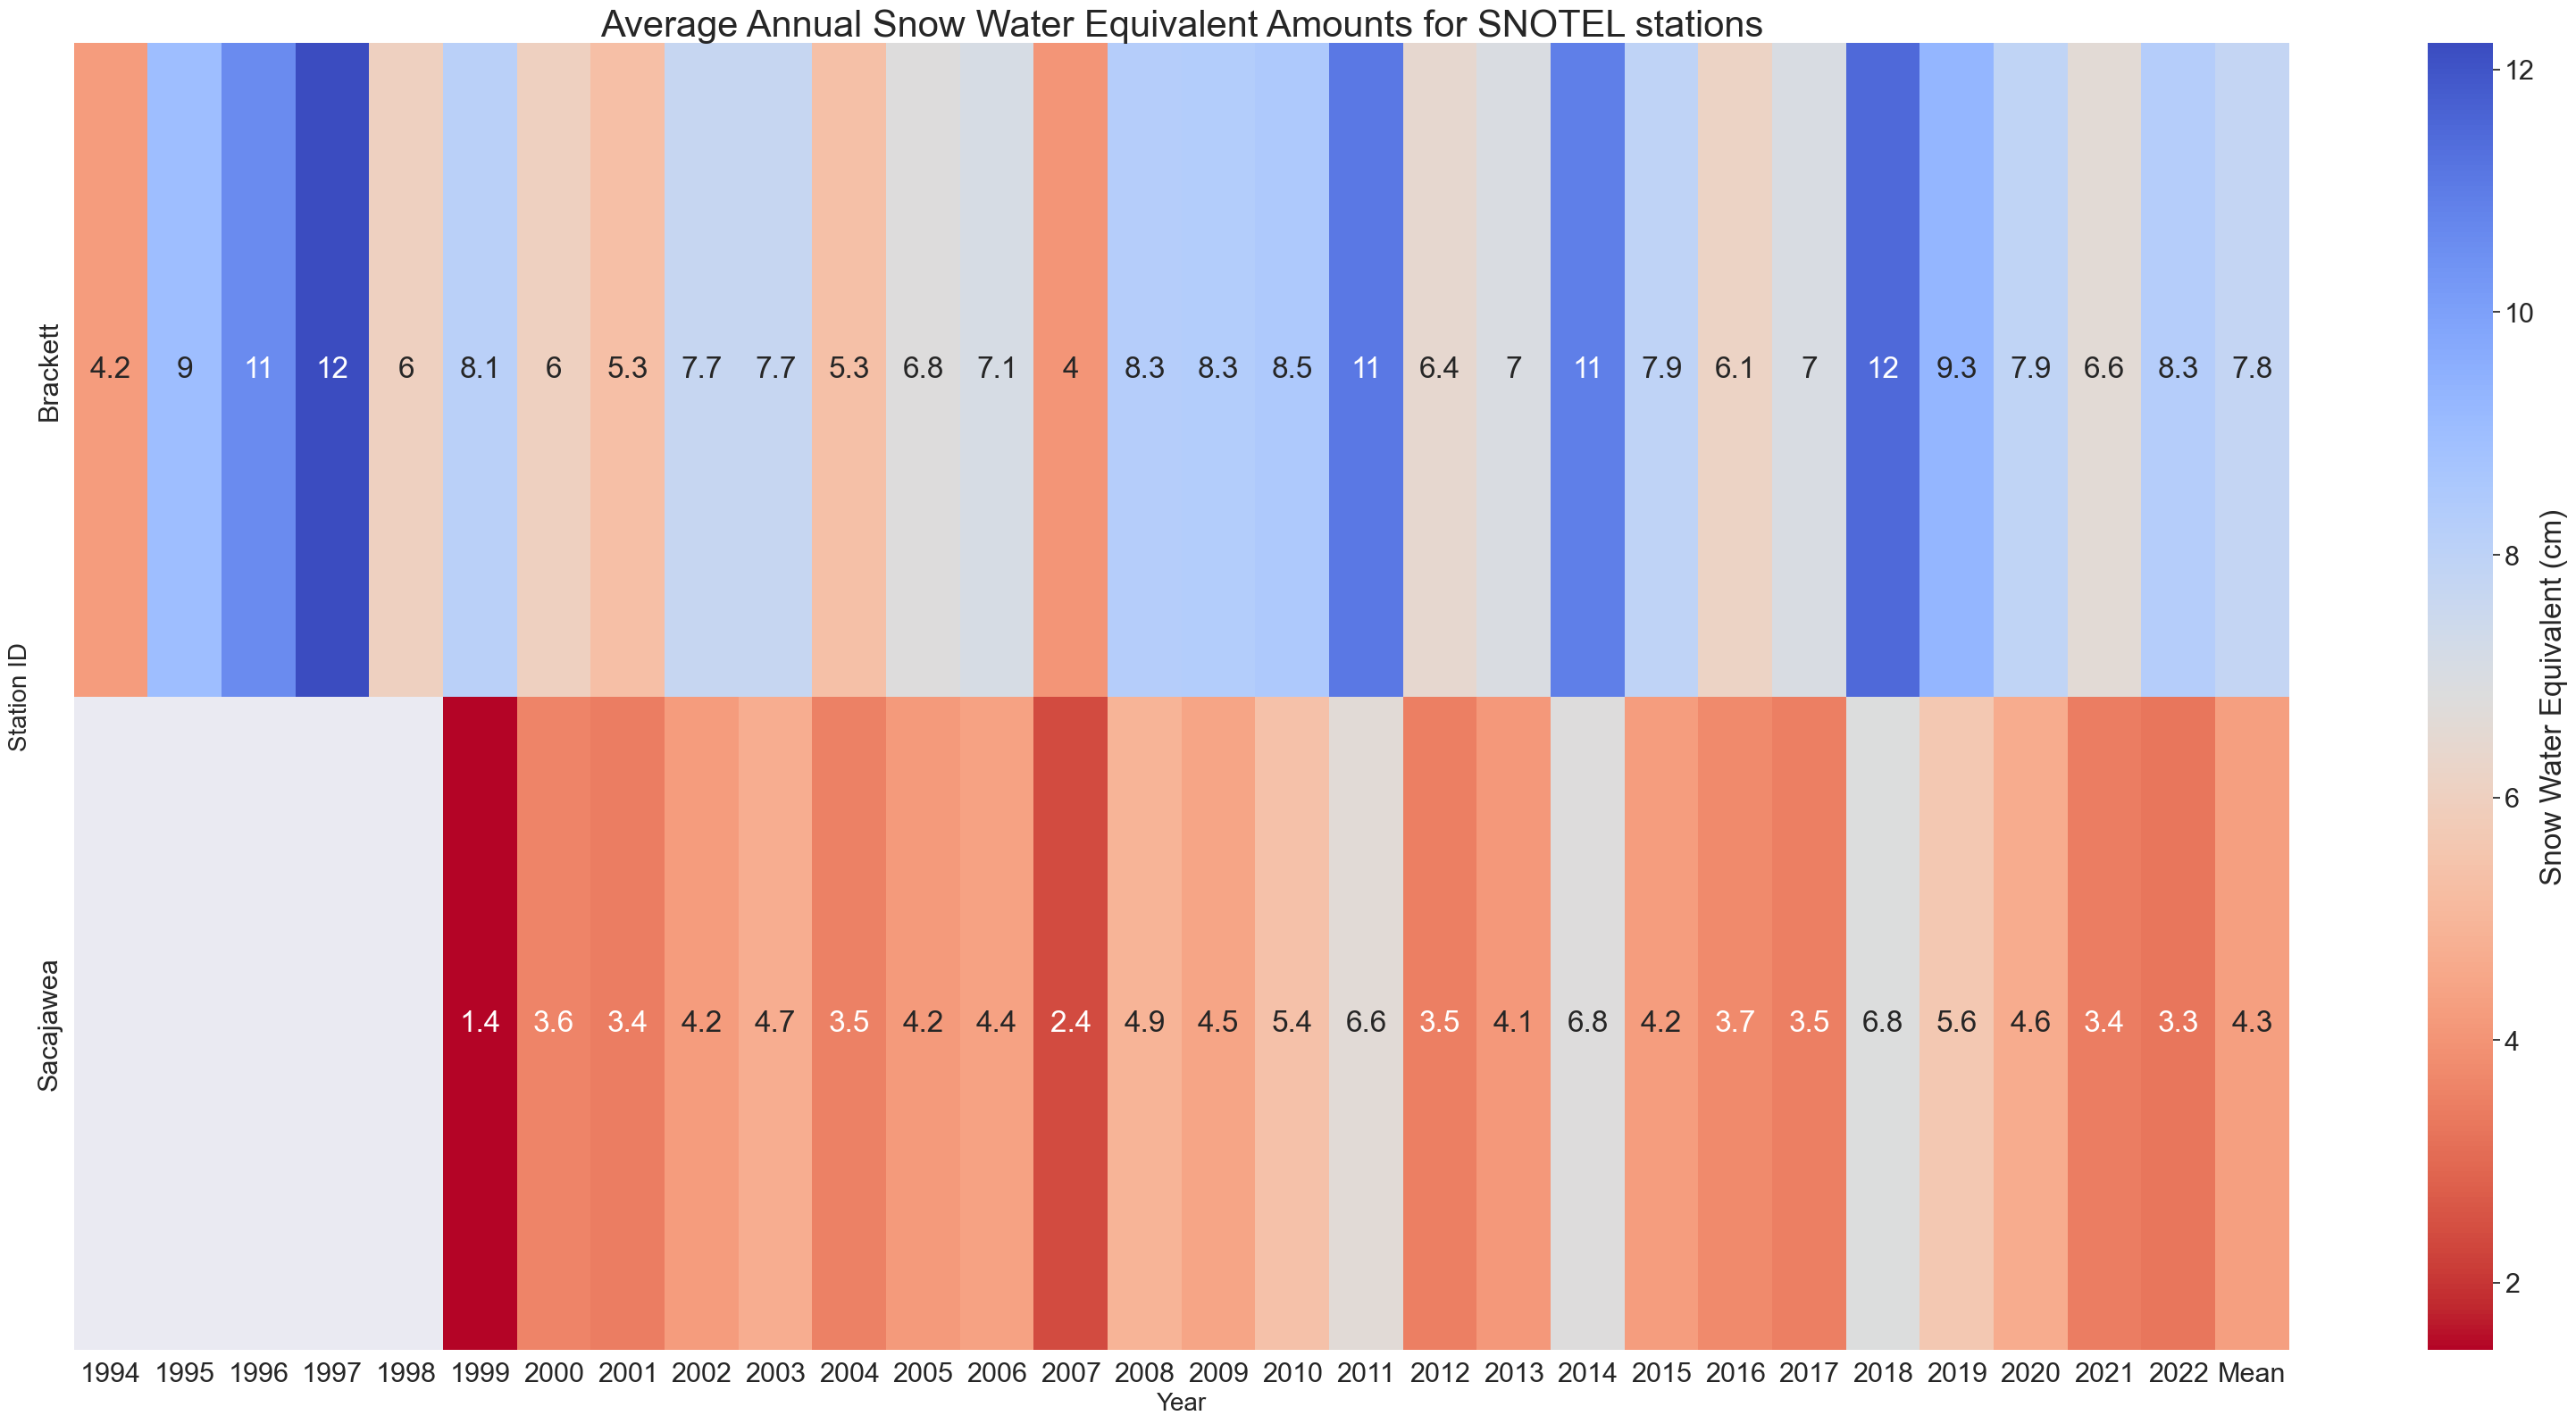

In [13]:
# Set image parameters
plt.figure(figsize = (40,19))
sns.set(font_scale=2)
# Set the plot title
plt.title('Average Annual Snow Water Equivalent Amounts for SNOTEL stations', fontsize = 30)
# Create a new heatmap for the mean fSCA across all years for each station
avg_fSCA_heat = sns.heatmap(snotel_pivot2, annot=True, cmap='coolwarm_r', fmt= '.2g', cbar_kws = {'label':'Snow Water Equivalent (cm)'})

plt.ylabel('Station ID', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
# avg_fSCA_heat.show()

#plt.savefig('Avgsnow_waterequiv_station.png', bbox_inches='tight')

In [14]:
snotel_precip = snotel_data_df.groupby(['Year','station']).agg({'Daily Precipitation (mm)':['sum']})
# Create a column to hold the avg_fSCA values
snotel_precip.columns = ['annual_precip']
# Reset the index of the new dataframe
snotel_precip = snotel_precip.reset_index()
# Check to make sure the dataframe has been updated 
snotel_precip

,Year,station,annual_precip
0,1994,Brackett,13.1
1,1995,Brackett,59.5
2,1996,Brackett,58.2
3,1997,Brackett,62.2
4,1998,Brackett,45.9
5,1999,Brackett,47.8
6,1999,Sacajawea,8.3
7,2000,Brackett,45.7
8,2000,Sacajawea,40.0
9,2001,Brackett,42.2


In [15]:
snotel_pivot3 = pd.pivot_table(snotel_precip,
                          values='annual_precip',
                          index='station',
                          columns='Year')
# Set the index by the station name
snotel_pivot3 = snotel_pivot3.reindex(index = ['Brackett','Sacajawea'])
# Create a new column for the mean values across all years!
snotel_pivot3['Mean'] = snotel_pivot3.mean(axis = 1)
# Check to make sure it is correct!
snotel_pivot3

Year,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Mean
station,,,,,,,,,,,,,,,,,,,,,
Brackett,13.1,59.5,58.2,62.2,45.9,47.8,45.7,42.2,49.0,49.6,...,62.0,50.2,47.6,56.7,65.1,57.0,49.4,41.8,31.6,50.358621
Sacajawea,NaN,NaN,NaN,NaN,NaN,8.3,40.0,37.2,39.6,42.7,...,57.7,45.9,46.6,49.5,57.2,50.9,46.0,36.5,27.1,44.829167


Text(0.5, 162.24999999999997, 'Year')

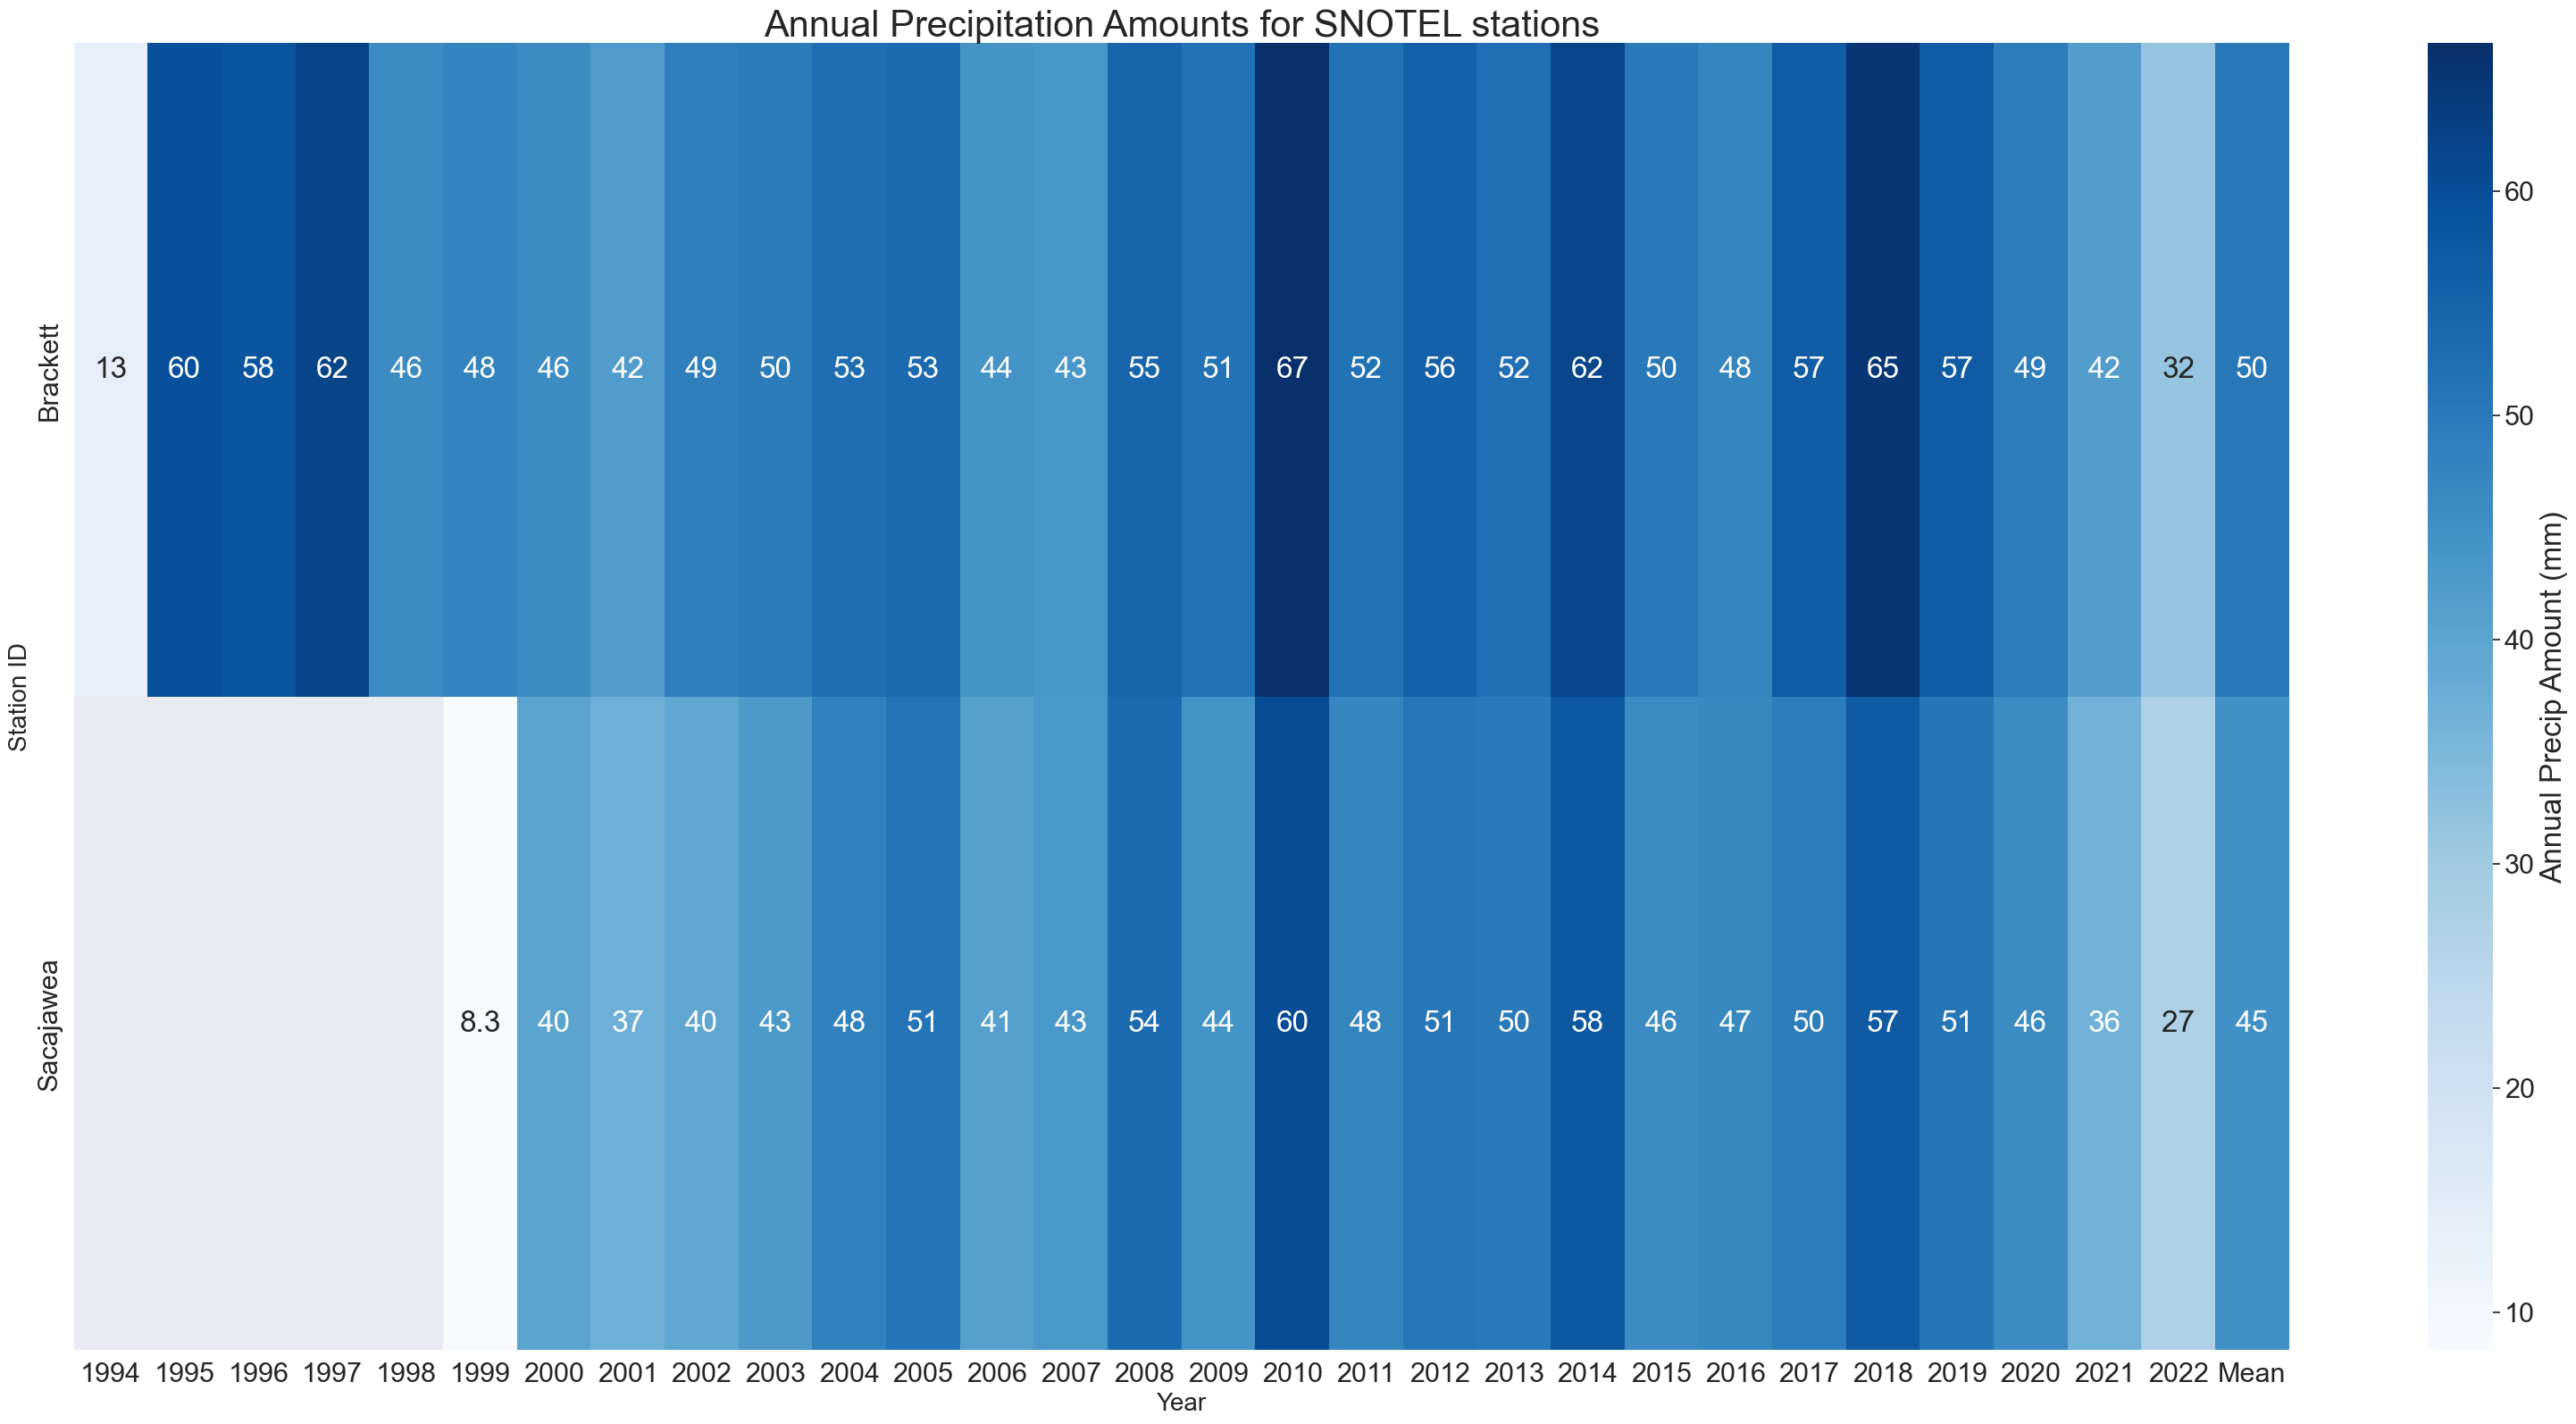

In [16]:
# Set image parameters
plt.figure(figsize = (40,19))
sns.set(font_scale=2)
# Set the plot title
plt.title('Annual Precipitation Amounts for SNOTEL stations', fontsize = 30)
# Create a new heatmap for the mean fSCA across all years for each station
avg_fSCA_heat = sns.heatmap(snotel_pivot3, annot=True, cmap='Blues', fmt= '.2g', cbar_kws = {'label':'Annual Precip Amount (mm)'})

plt.ylabel('Station ID', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
# avg_fSCA_heat.show()

#plt.savefig('AnnualPrecip_station.png', bbox_inches='tight')

In [17]:
# Create a new dataframe to hold the average biweekly values for each station
# Group the dataframe when date and station match, then take the average fSCA for when
# that condition is met
avg_snowdepth_snotel = snotel_data_df.groupby(['Month','station']).agg({'Daily Snow Depth (cm)':['mean']})
# Create a column to hold the avg_fSCA values
avg_snowdepth_snotel.columns = ['avg_snowdepth']
# Reset the index of the new dataframe
avg_snowdepth_snotel = avg_snowdepth_snotel.reset_index()
# Check to make sure the dataframe has been updated 
avg_snowdepth_snotel

,Month,station,avg_snowdepth
0,1,Brackett,38.514516
1,1,Sacajawea,27.083871
2,2,Brackett,51.438938
3,2,Sacajawea,38.161062
4,3,Brackett,58.333871
5,3,Sacajawea,41.246774
6,4,Brackett,59.488333
7,4,Sacajawea,35.423333
8,5,Brackett,36.841935
9,5,Sacajawea,11.624194


In [18]:
# Pivot the dataframe for graphing purposes
avg_snowdepth_snotel_pivot = pd.pivot_table(avg_snowdepth_snotel,
                          values='avg_snowdepth',
                          index='station',
                          columns='Month')
# Reorder the values so that the stations are in descending elevation order
avg_snowdepth_snotel_pivot = avg_snowdepth_snotel_pivot.reindex(index = ['Brackett','Sacajawea'])
# Look at the dataframe
avg_snowdepth_snotel_pivot

Month,1,2,3,4,5,6,7,8,9,10,11,12
station,,,,,,,,,,,,
Brackett,38.514516,51.438938,58.333871,59.488333,36.841935,3.232406,0.003072,0.004710,0.20,3.111290,12.043333,25.064516
Sacajawea,27.083871,38.161062,41.246774,35.423333,11.624194,0.243200,0.000000,0.003145,0.05,1.435484,6.433333,16.070968


Text(0.5, 162.24999999999997, 'Month')

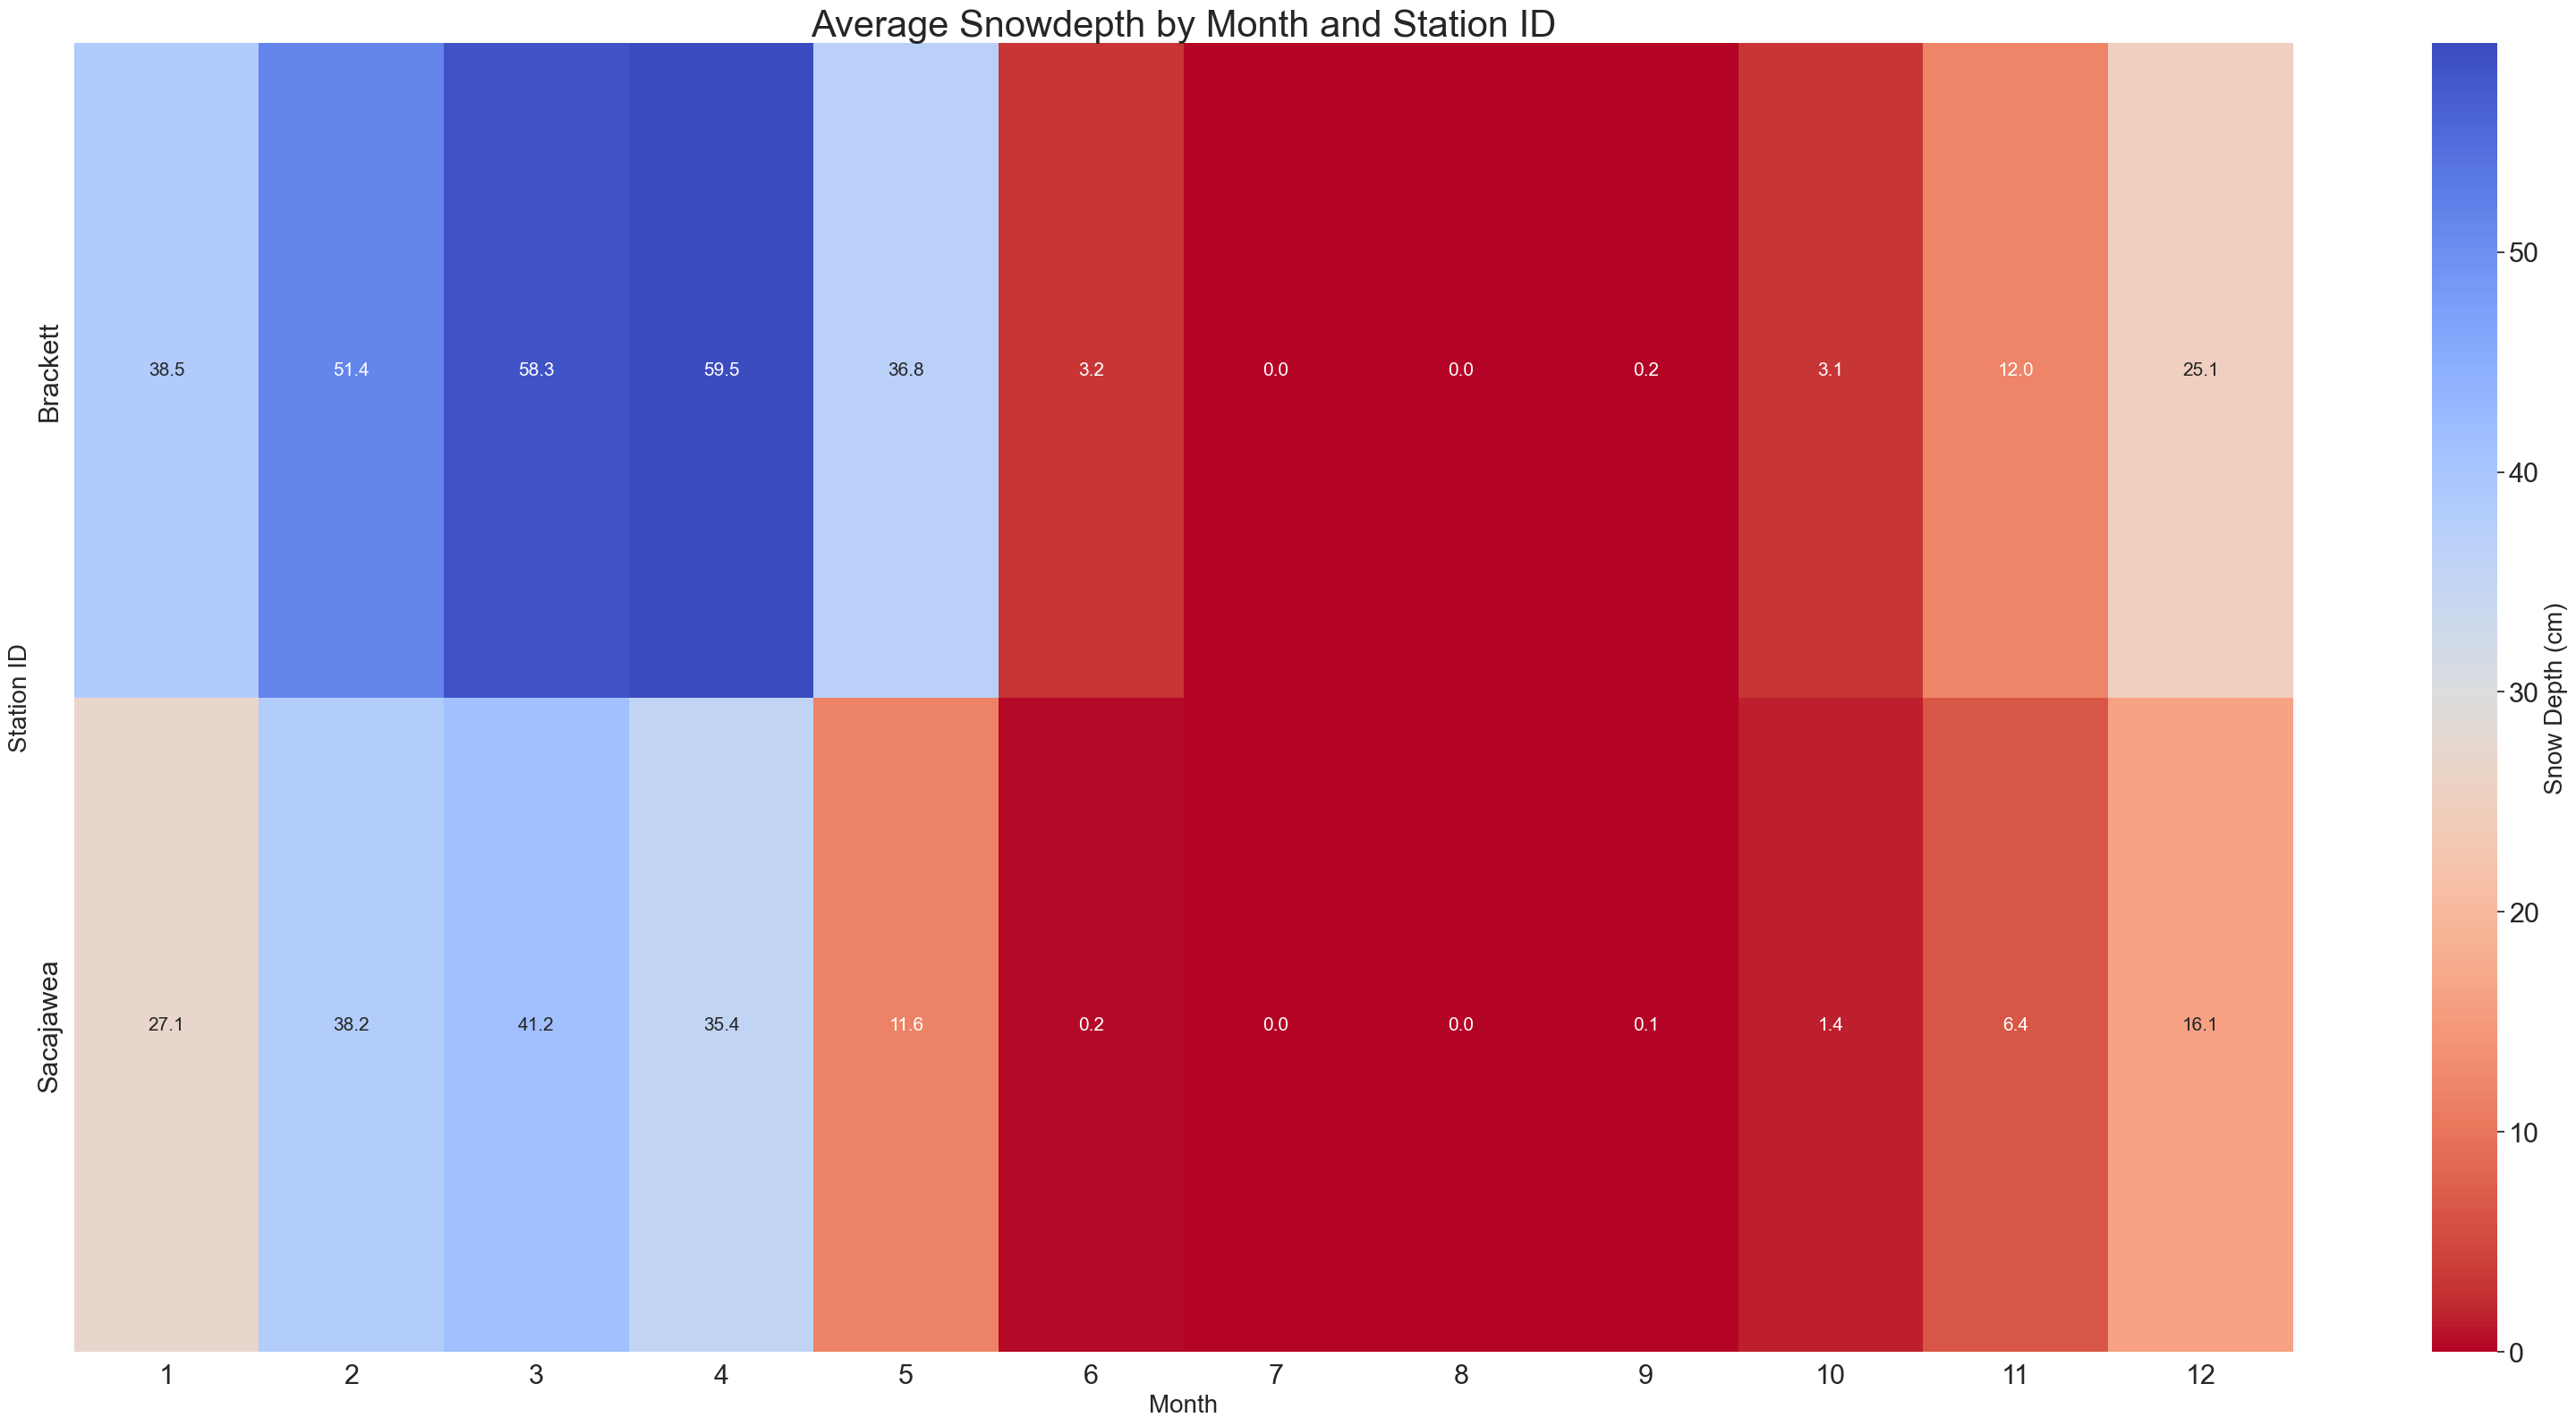

In [19]:
# Plot the average fSCA by each biweekly period and station
# Set figure size parameters
plt.figure(figsize = (40,19))
sns.set(font_scale=2)
# Assign a title 
plt.title('Average Snowdepth by Month and Station ID', fontsize = 30)
# Create a heatmap
biweek_avg = sns.heatmap(avg_snowdepth_snotel_pivot, annot=True, cmap='coolwarm_r', fmt = '.1f', annot_kws={"fontsize":15}, cbar_kws = {'label':'Snow Depth (cm)'})
# Set the legend label
biweek_avg.figure.axes[-1].yaxis.label.set_size(20)
# Set y-label
plt.ylabel('Station ID', fontsize = 20)
# Set x label
plt.xlabel('Month', fontsize = 20)
# Save the figure!
#plt.savefig('Avg_SDepth_Month_station.png', bbox_inches='tight')

In [21]:
# Create a new dataframe to hold the average biweekly values for each station
# Group the dataframe when date and station match, then take the average fSCA for when
# that condition is met
avg_airtemp_snotel = snotel_data_df.groupby(['Month','station']).agg({'Daily Average Temperature (F)':['mean']})
# Create a column to hold the avg_fSCA values
avg_airtemp_snotel.columns = ['avg_airtemp']
# Reset the index of the new dataframe
avg_airtemp_snotel = avg_airtemp_snotel.reset_index()
# Check to make sure the dataframe has been updated 
avg_airtemp_snotel

,Month,station,avg_airtemp
0,1,Brackett,25.041797
1,1,Sacajawea,27.293240
2,2,Brackett,23.263515
3,2,Sacajawea,24.548277
4,3,Brackett,29.528940
5,3,Sacajawea,31.805863
6,4,Brackett,34.331214
7,4,Sacajawea,36.203391
8,5,Brackett,42.196544
9,5,Sacajawea,43.452342


In [22]:
# Pivot the dataframe for graphing purposes
avg_airtemp_snotel_pivot = pd.pivot_table(avg_airtemp_snotel,
                          values='avg_airtemp',
                          index='station',
                          columns='Month')
# Reorder the values so that the stations are in descending elevation order
avg_airtemp_snotel_pivot = avg_airtemp_snotel_pivot.reindex(index = ['Brackett','Sacajawea'])
# Look at the dataframe
avg_airtemp_snotel_pivot

Month,1,2,3,4,5,6,7,8,9,10,11,12
station,,,,,,,,,,,,
Brackett,25.041797,23.263515,29.528940,34.331214,42.196544,50.668325,60.543303,58.944713,50.349803,38.418618,30.161383,23.572143
Sacajawea,27.293240,24.548277,31.805863,36.203391,43.452342,52.025391,60.384712,57.980860,50.484636,40.100252,32.344348,25.308948


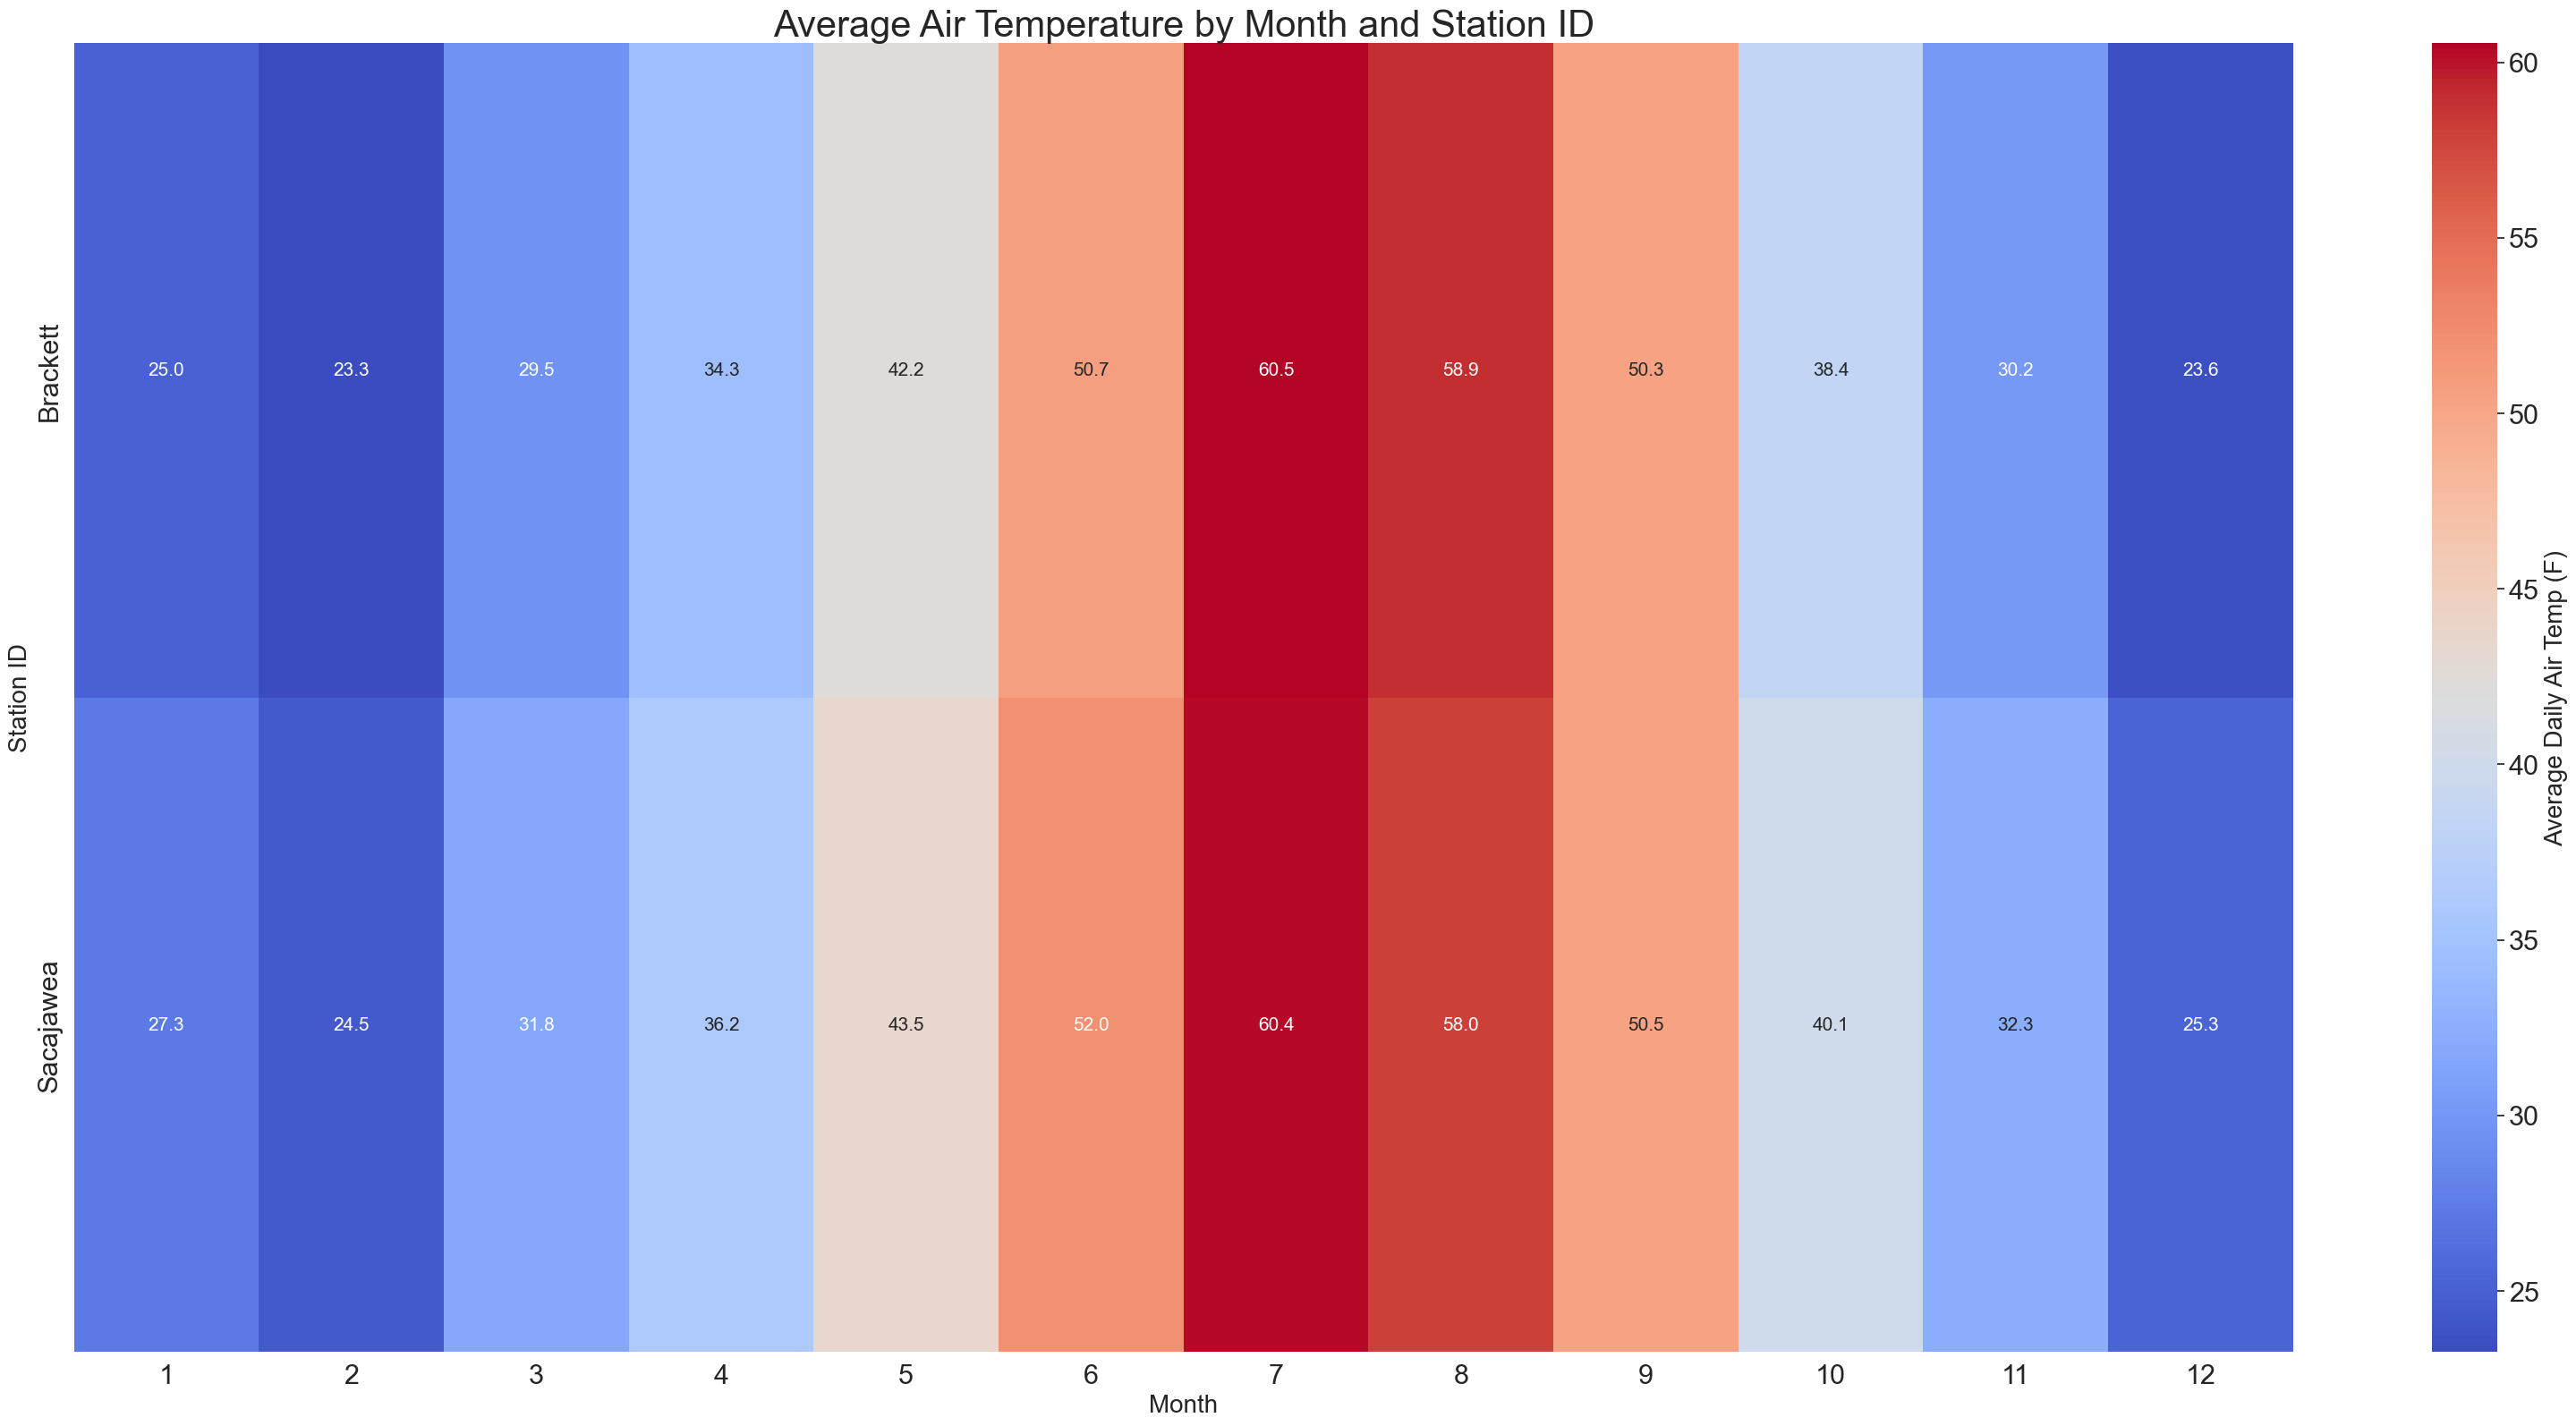

In [25]:
# Plot the average fSCA by each biweekly period and station
# Set figure size parameters
plt.figure(figsize = (40,19))
sns.set(font_scale=2)
# Assign a title 
plt.title('Average Air Temperature by Month and Station ID', fontsize = 30)
# Create a heatmap
biweek_avg = sns.heatmap(avg_airtemp_snotel_pivot, annot=True, cmap='coolwarm', fmt = '.1f', annot_kws={"fontsize":15}, cbar_kws = {'label':'Average Daily Air Temp (F)'})
# Set the legend label
biweek_avg.figure.axes[-1].yaxis.label.set_size(20)
# Set y-label
plt.ylabel('Station ID', fontsize = 20)
# Set x label
plt.xlabel('Month', fontsize = 20)
# Save the figure!
plt.savefig('Avg_Airtemp_Month_station.png', bbox_inches='tight')

In [37]:
# Create a new dataframe to hold the average biweekly values for each station
# Group the dataframe when date and station match, then take the average fSCA for when
# that condition is met
avg_airtemp_snotel_daily = snotel_data_df.groupby(['DOY','station']).agg({'Daily Average Temperature (F)':['mean']})
# Create a column to hold the avg_fSCA values
avg_airtemp_snotel_daily.columns = ['avg_airtemp']
# Reset the index of the new dataframe
avg_airtemp_snotel_daily_daily = avg_airtemp_snotel_daily.reset_index()
# Check to make sure the dataframe has been updated 
avg_airtemp_snotel_daily

avg_airtemp
DOY   station               
01-01 Brackett     22.331429
      Sacajawea    21.669565
01-02 Brackett     25.224286
      Sacajawea    26.686087
01-03 Brackett     24.774286
...                      ...
12-29 Sacajawea    22.272174
12-30 Brackett     20.955714
      Sacajawea    20.769565
12-31 Brackett     20.724286
      Sacajawea    20.378261

[732 rows x 1 columns]

In [38]:
snotel_pivot4 = pd.pivot_table(avg_airtemp_snotel_daily,
                          values='avg_airtemp',
                          index='station',
                          columns='DOY')
# Set the index by the station name
snotel_pivot4 = snotel_pivot4.reindex(index = ['Brackett','Sacajawea'])
# Create a new column for the mean values across all years!
snotel_pivot4['Mean'] = snotel_pivot4.mean(axis = 1)
# Check to make sure it is correct!
snotel_pivot4

DOY,01-01,01-02,01-03,01-04,01-05,01-06,01-07,01-08,01-09,01-10,...,12-23,12-24,12-25,12-26,12-27,12-28,12-29,12-30,12-31,Mean
station,,,,,,,,,,,,,,,,,,,,,
Brackett,22.331429,25.224286,24.774286,22.723571,21.624286,24.446429,26.992143,26.522857,25.809286,23.430714,...,22.678571,23.996429,23.912857,24.099286,24.530000,23.662143,22.389286,20.955714,20.724286,38.984187
Sacajawea,21.669565,26.686087,26.764348,25.801739,24.056522,27.202609,28.071304,28.783478,27.899130,26.435652,...,23.962609,25.966087,24.455652,24.103478,25.504348,24.674783,22.272174,20.769565,20.378261,40.229109


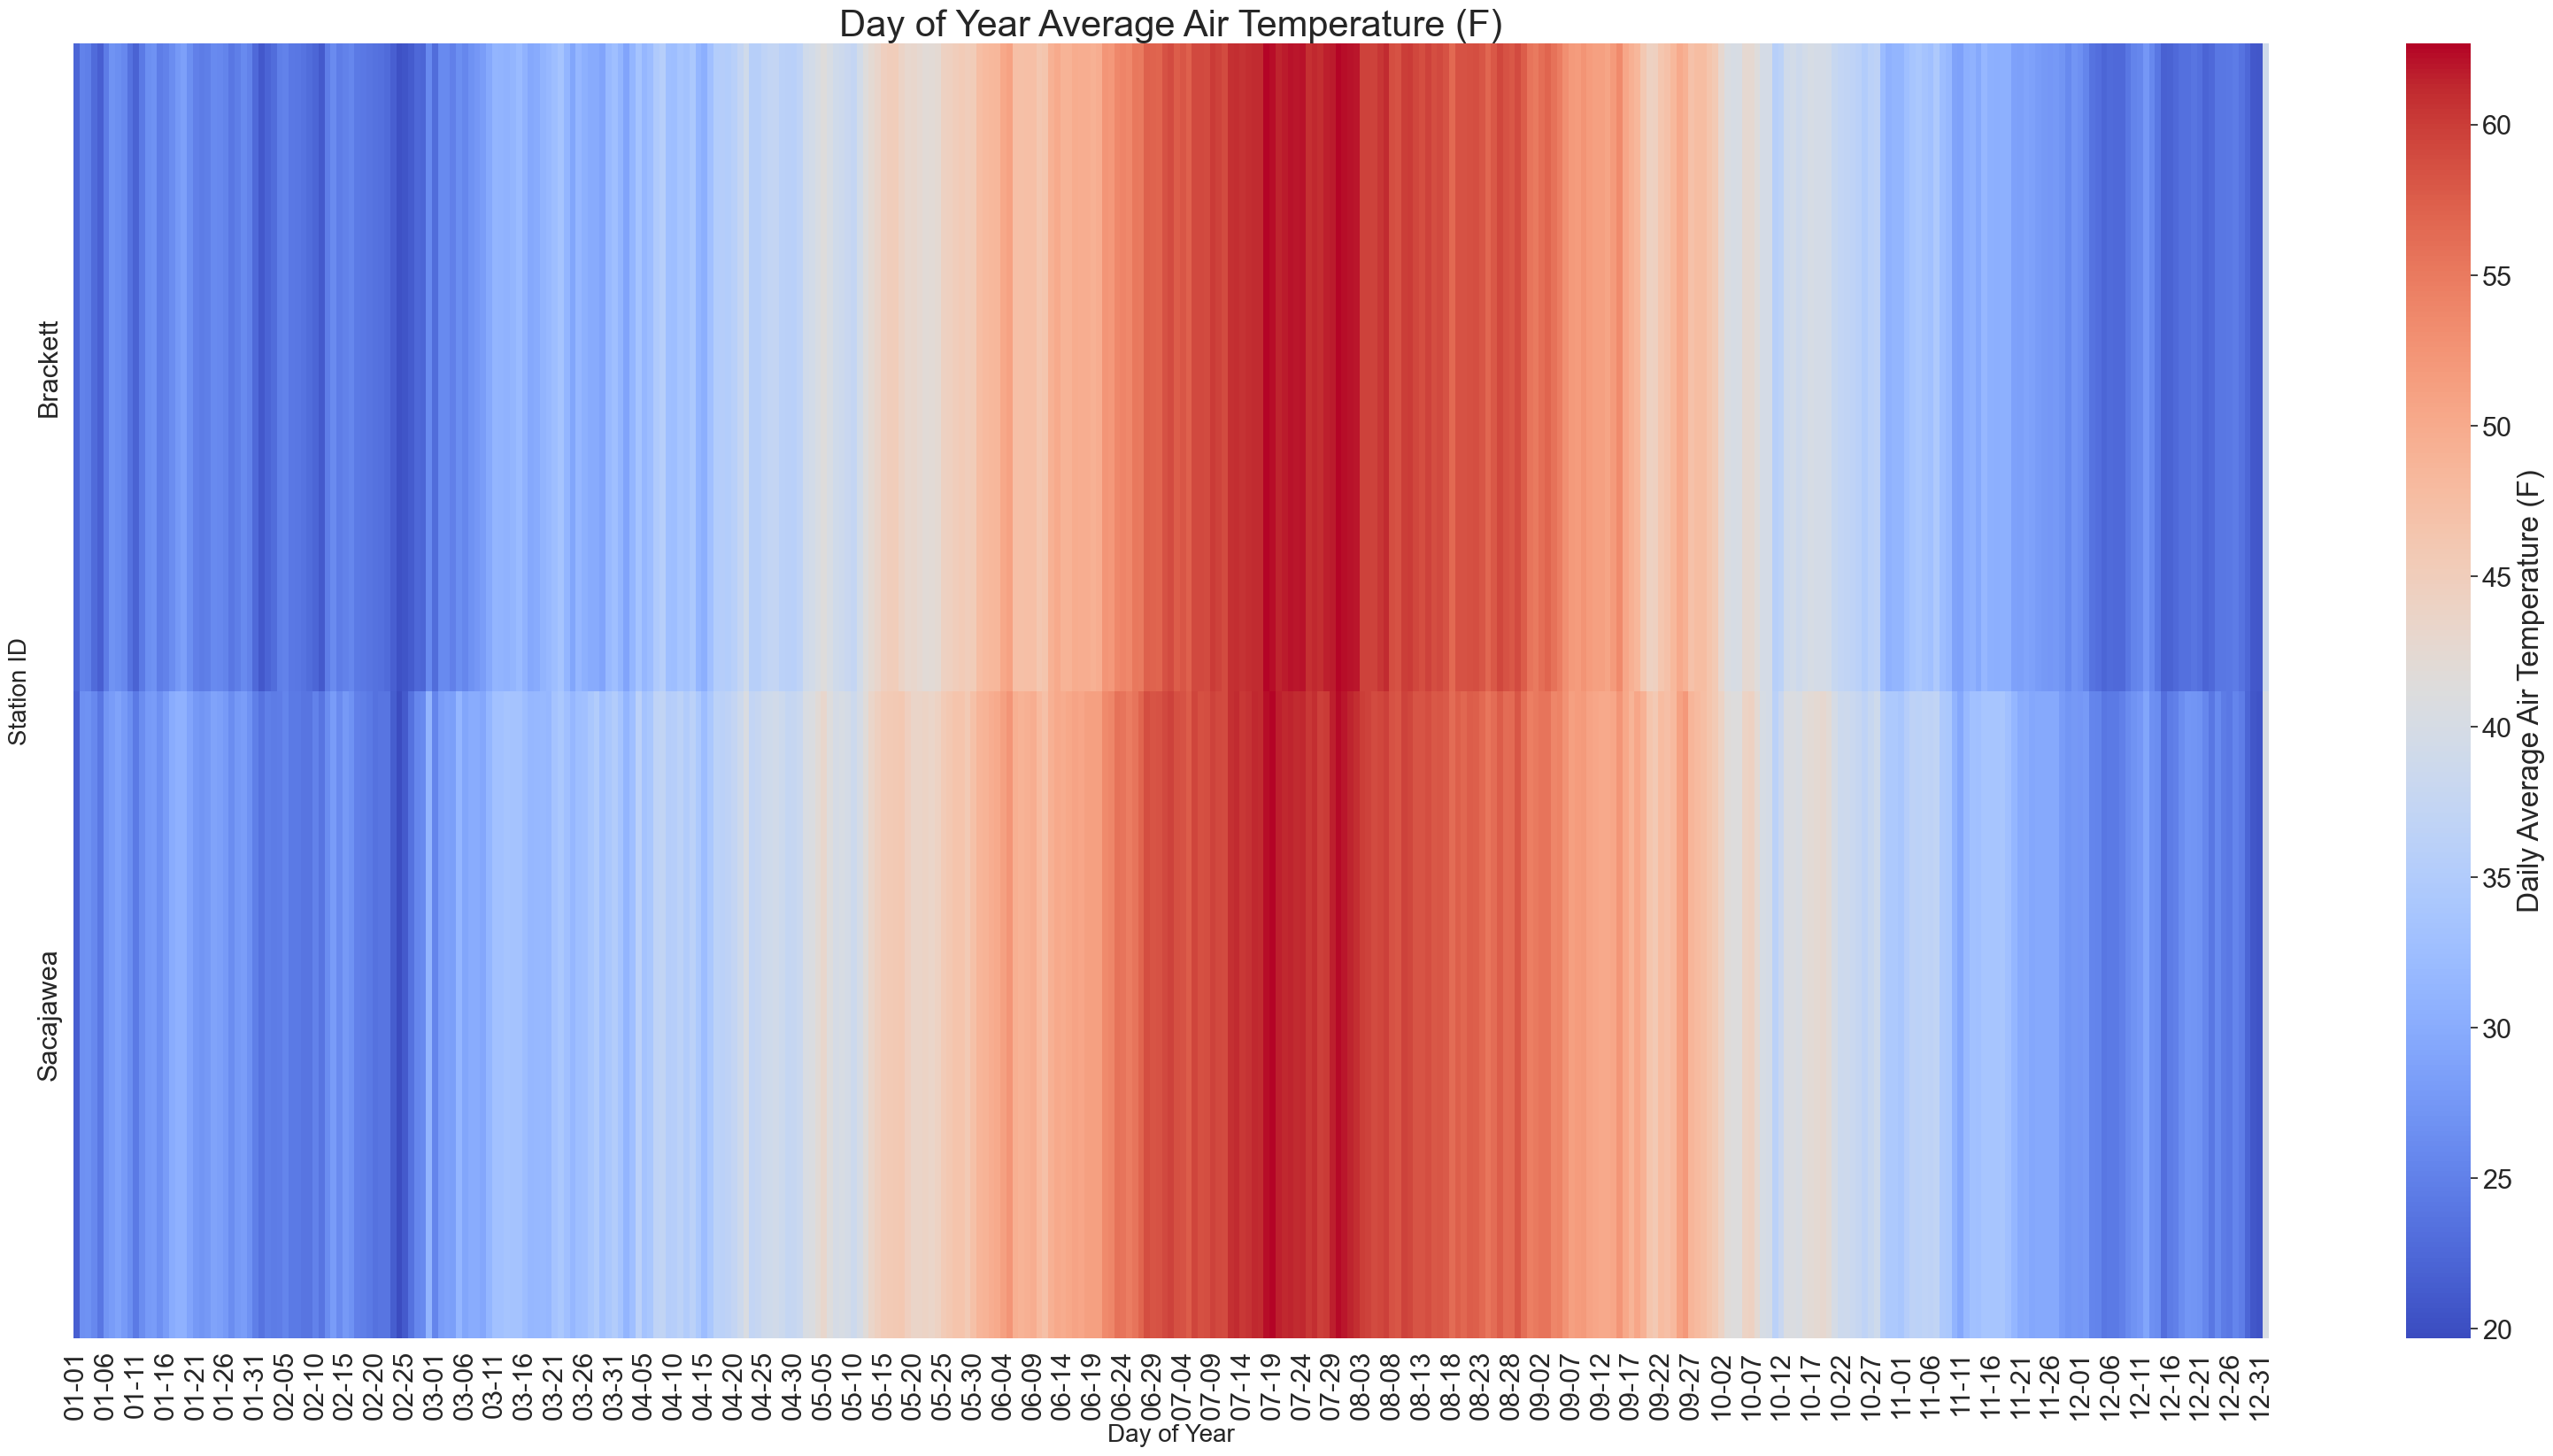

In [68]:
# Set image parameters
plt.figure(figsize = (40,19))
sns.set(font_scale=2)
# Set the plot title
plt.title('Day of Year Average Air Temperature (F)', fontsize = 30)
# Create a new heatmap for the mean fSCA across all years for each station
avg_fSCA_heat = sns.heatmap(snotel_pivot4, annot=False, cmap='coolwarm', cbar_kws = {'label':'Daily Average Air Temperature (F)'})

plt.ylabel('Station ID', fontsize = 20)
plt.xlabel('Day of Year', fontsize = 20)
# avg_fSCA_heat.show()

plt.savefig('Figures/AvgAirTemp_DOY.png', bbox_inches='tight')

In [58]:
# Create a new dataframe to hold the average biweekly values for each station
# Group the dataframe when date and station match, then take the average fSCA for when
# that condition is met
avg_snowdepth_snotel_daily = snotel_data_df.groupby(['DOY','station']).agg({'Daily Snow Depth (cm)':['mean']})
# Create a column to hold the avg_fSCA values
avg_snowdepth_snotel_daily.columns = ['avg_snowdepth']
# Reset the index of the new dataframe
avg_snowdepth_snotel_daily_daily = avg_snowdepth_snotel_daily.reset_index()
# Check to make sure the dataframe has been updated 
avg_snowdepth_snotel_daily

avg_snowdepth
DOY   station                 
01-01 Brackett           34.10
      Sacajawea          23.45
01-02 Brackett           34.10
      Sacajawea          23.50
01-03 Brackett           33.95
...                        ...
12-29 Sacajawea          21.25
12-30 Brackett           32.65
      Sacajawea          22.45
12-31 Brackett           33.75
      Sacajawea          23.30

[732 rows x 1 columns]

In [60]:
snotel_pivot5 = pd.pivot_table(avg_snowdepth_snotel_daily,
                          values='avg_snowdepth',
                          index='station',
                          columns='DOY')
# Set the index by the station name
snotel_pivot5 = snotel_pivot5.reindex(index = ['Brackett','Sacajawea'])
# Create a new column for the mean values across all years!
snotel_pivot5['Mean'] = snotel_pivot5.mean(axis = 1)
# Check to make sure it is correct!
snotel_pivot5

DOY,01-01,01-02,01-03,01-04,01-05,01-06,01-07,01-08,01-09,01-10,...,12-23,12-24,12-25,12-26,12-27,12-28,12-29,12-30,12-31,Mean
station,,,,,,,,,,,,,,,,,,,,,
Brackett,34.10,34.1,33.95,33.7,34.80,35.50,35.70,36.05,35.9,36.7,...,28.5,28.45,28.75,29.50,30.0,30.40,31.15,32.65,33.75,23.943208
Sacajawea,23.45,23.5,23.50,23.4,24.15,24.45,24.75,24.90,25.1,25.3,...,18.9,18.45,18.60,19.55,20.1,20.85,21.25,22.45,23.30,14.742519


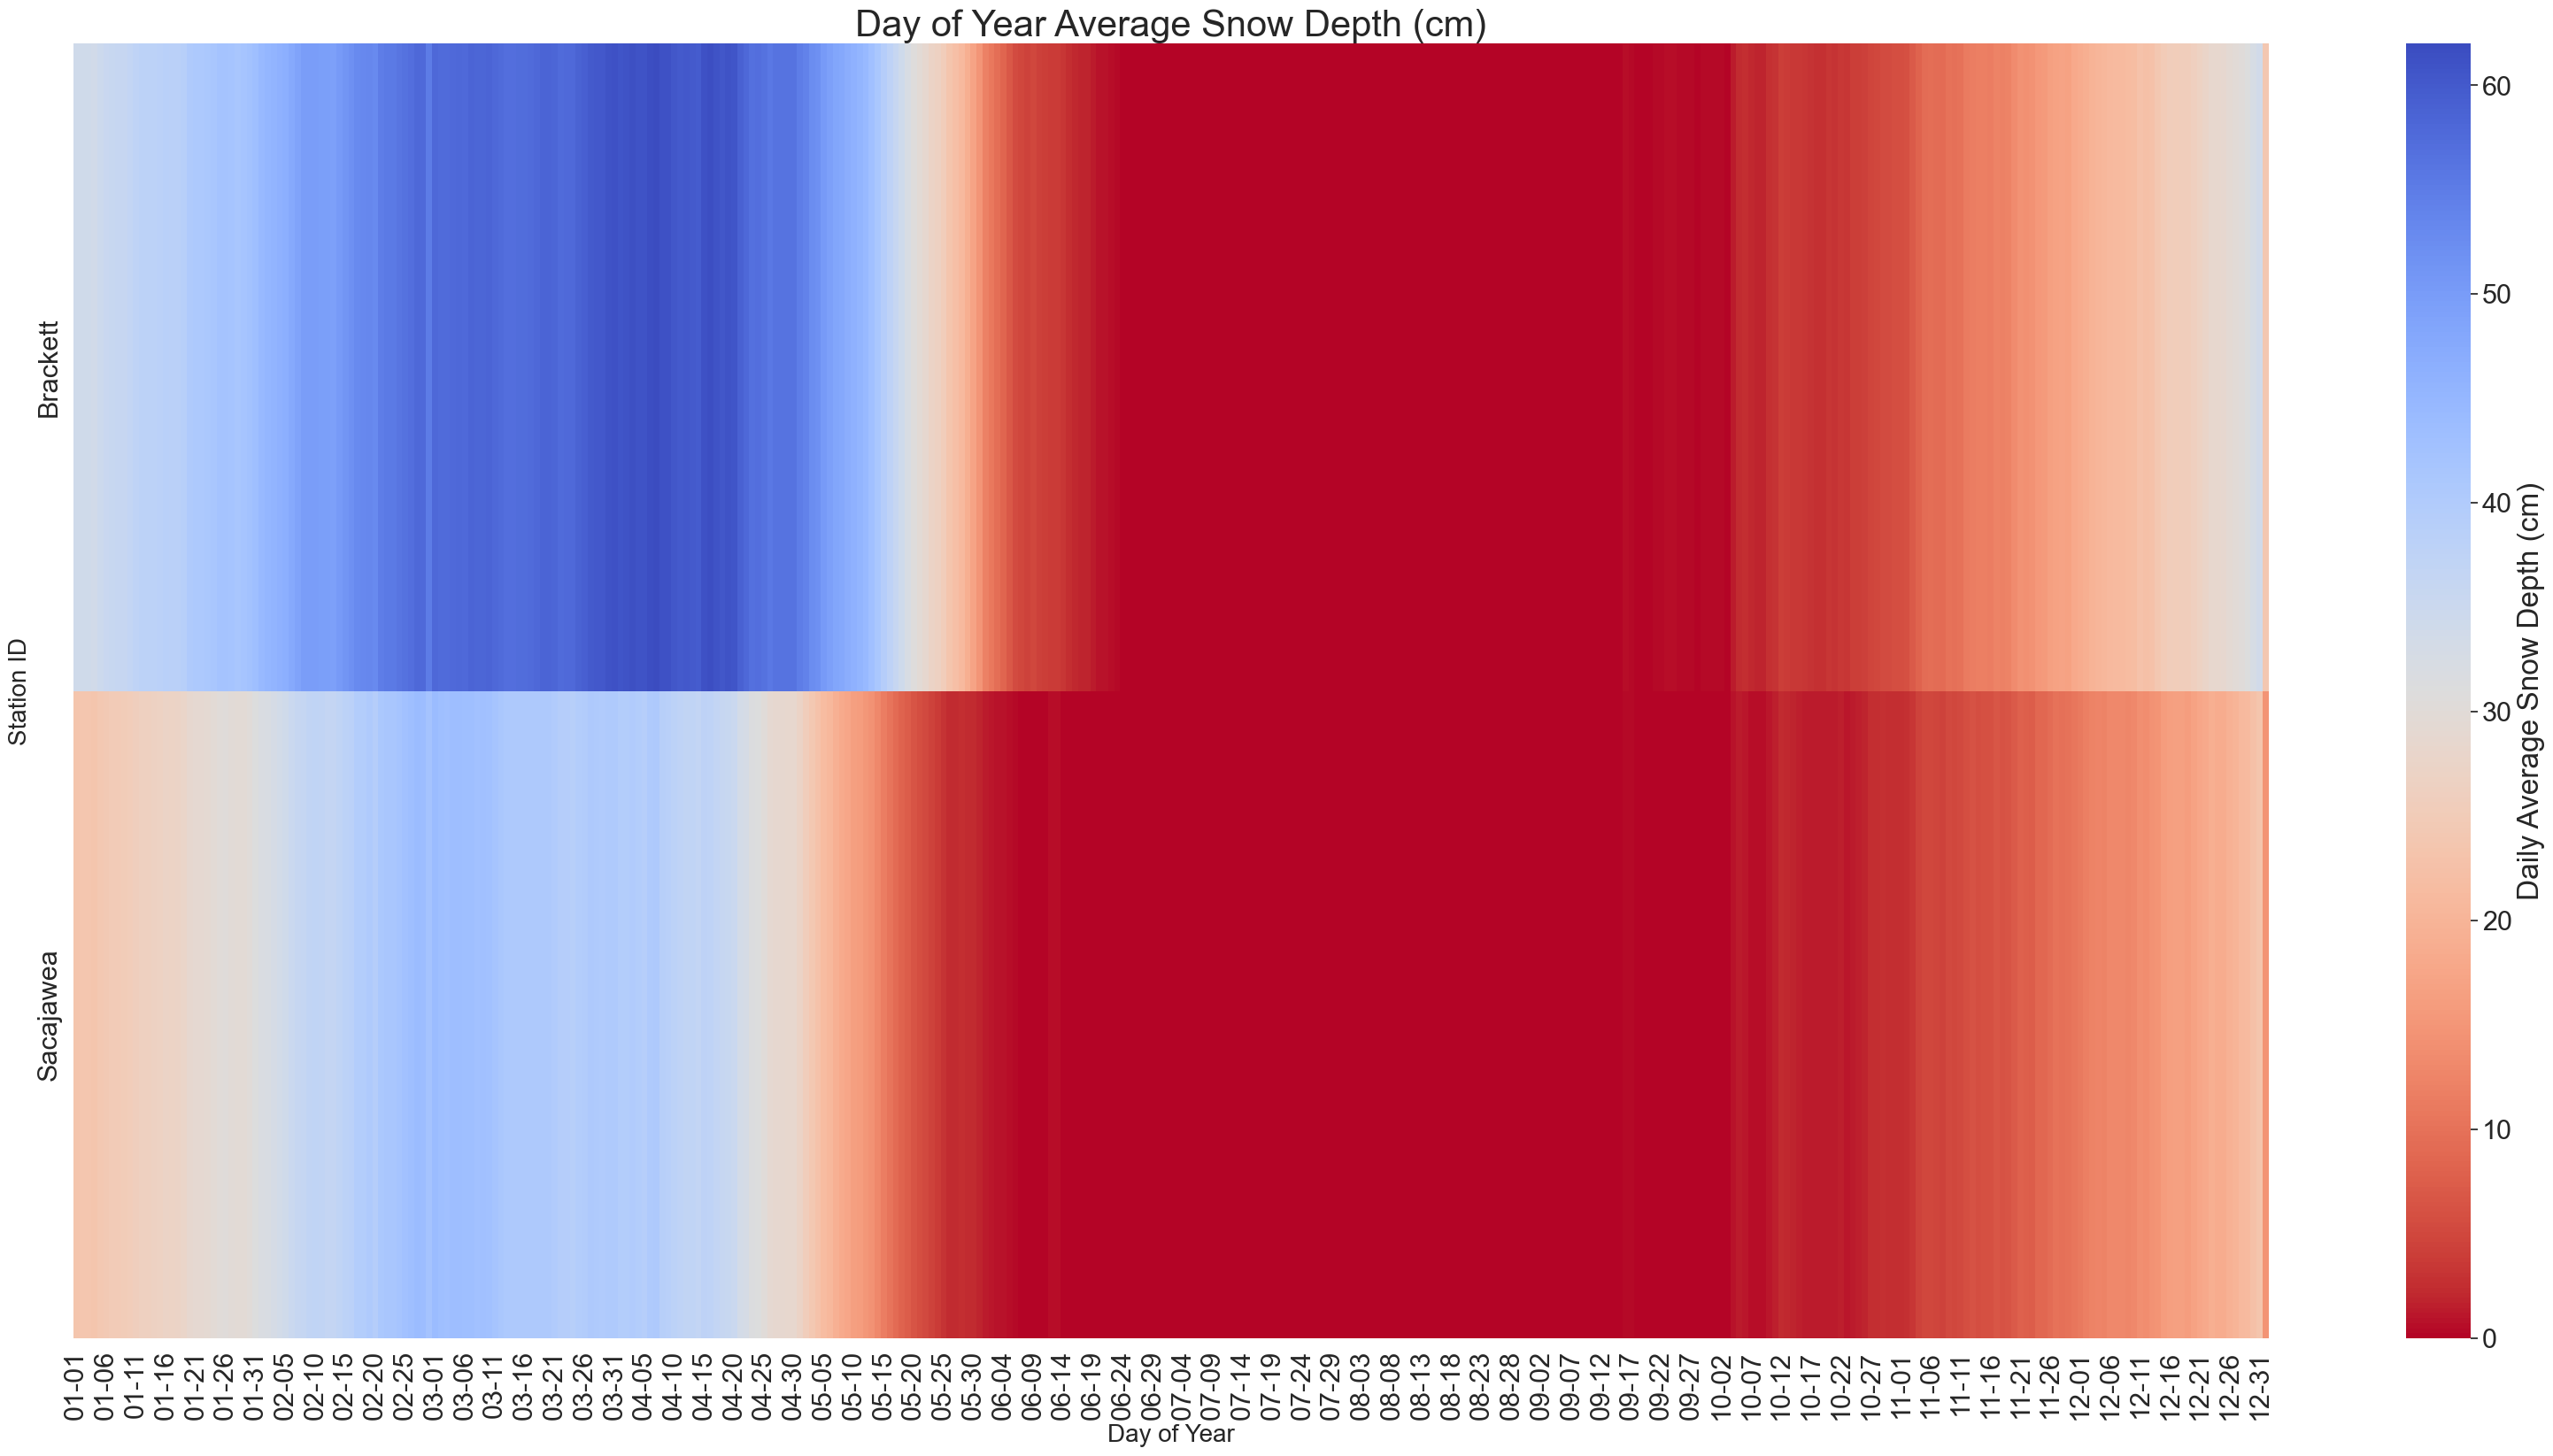

In [71]:
# Set image parameters
plt.figure(figsize = (40,19))
sns.set(font_scale=2)
# Set the plot title
plt.title('Day of Year Average Snow Depth (cm)', fontsize = 30)
# Create a new heatmap for the mean fSCA across all years for each station
avg_fSCA_heat = sns.heatmap(snotel_pivot5, annot=False, cmap='coolwarm_r', cbar_kws = {'label':'Daily Average Snow Depth (cm)'})

plt.ylabel('Station ID', fontsize = 20)
plt.xlabel('Day of Year', fontsize = 20)
# avg_fSCA_heat.show()

plt.savefig('Figures/AvgSnowDepth_DOY.png', bbox_inches='tight')

## Now, let's start to combine the data for final images!

In [ ]:
# Set the staion name that you want to create visualizations for.
# The way this code is set up, you should be able to change this name and then run the code to create 
# your desired outputs. 
fSCA_sitename = 'LChena'
# Choose the corresponding snotel dataframe station name
snotel_station = 'LChena'
# Set the dataframe you want to use; either Chena or Willow based on what station
fSCA_data = chena_fSCA_df

In [ ]:
chena_fSCA_df

In [ ]:
plt.figure(figsize = (15,18))
sns.set(font_scale=1)
sns.set_theme(style="ticks")
# Plot yearly fSCA depletion to compare variability across years
# Create the original plot, showing the SNOTEL snow depth depletion data
# This plot shows the changes in fSCA depletion from year-to-year
fSCA_yearly_plot = sns.relplot(
    # Set the data source for the desired SNOTEL station 
    data=fSCA_data[fSCA_data['station'] == fSCA_sitename],
    # Plot Daily Snow Depth (cm) by Month, with a graph for each year (col = "Year") and 
    # color the hue based on year.
    x="BiWeek", y='fSCA', col = "Year", hue = "Year",
    # Set as a lineplot, with a user defined palette, with set linewidth, and a zorder of
    # _____
    kind="line", palette="crest", linewidth=4, zorder=5,
    # Wrap so 4 graphs show up on each row, with a set height, and aspect. Set legend to 
    # false
    col_wrap=4, height=2, aspect=1.5, legend=False,
)
# Iterate over each subplot to customize further
for year, ax in fSCA_yearly_plot.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.4, 1.05, year, transform=ax.transAxes, fontweight="bold")
    
# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
fSCA_yearly_plot.set_titles("")
fSCA_yearly_plot.set_axis_labels("", "fSCA")
fSCA_yearly_plot.tight_layout()
fSCA_yearly_plot.set_xticklabels(rotation = 75)


# Save the plot to the working folder
#plt.savefig('Figures/fSCA_byYear_' + snotel_station + '.png', bbox_inches='tight')

In [ ]:
# Create a singular plot with all of the years for the station.
# This is a busy plot, but it can show the variability between years
fSCA_var_plot = sns.relplot(
    # Set the data source for the desired SNOTEL station 
    data=fSCA_data[fSCA_data['station'] == fSCA_sitename],
    # Plot Daily Snow Depth (cm) by Month, with a graph for each year (col = "Year") and 
    # color the hue based on year.
    x="BiWeek", y='fSCA', hue = "Year",
    # Set as a lineplot, with a user defined palette, with set linewidth, and a zorder of
    # _____
    kind="line", palette="viridis", 
)
# Iterate over each subplot to customize further
# for year, ax in teuchet_plot.axes_dict.items():


#     # Add the title as an annotation within the plot
#     ax.text(.4, 1.05, year, transform=ax.transAxes, fontweight="bold")
    
# # Reduce the frequency of the x axis ticks
#teuchet_plot.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
fSCA_var_plot.set_titles("Yearly fSCA Depletion")
fSCA_var_plot.set_axis_labels("", "fSCA")
fSCA_var_plot.tight_layout()
fSCA_var_plot.set_xticklabels(rotation = 75)
fSCA_var_plot.set(title = fSCA_sitename + ' fSCA Yearly Distributions')
plt.savefig('Figures/' + fSCA_sitename + '_fSCA.png', bbox_inches='tight')

In [ ]:
# Create a plot to compare fSCA with mean snow depth depletion
fSCA_compare = sns.relplot(
    # Set the data source for the desired SNOTEL station 
    data=fSCA_data[fSCA_data['station'] == fSCA_sitename],
    # Plot Daily Snow Depth (cm) by Month, with a graph for each year (col = "Year") and 
    # color the hue based on year.
    x="Month", y='fSCA', col = "Year", hue = "Year",
    # Set as a lineplot, with a user defined palette, with set linewidth, and a zorder of
    # _____
    kind="line", palette="crest", linewidth=3, zorder=5,
    # Wrap so 4 graphs show up on each row, with a set height, and aspect. Set legend to 
    # false
    col_wrap=4, height=2, aspect=1.5, legend=False, 
)
# # Iterate over each subplot to customize further
for year, ax in fSCA_compare.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.4, 1.05, year, transform=ax.transAxes, fontweight="bold")
    ax.set(xlim=(1,12))
    
 #Plot every year's time series in the background
    sns.lineplot(
        data=snotel_data_df_filtered[snotel_data_df_filtered['station'] == snotel_station], x = 'Month', y = 'Daily Snow Depth (cm)',
        color=".7", linewidth=3, ax=ax.twinx(), legend = True
    )

# # Tweak the supporting aspects of the plot
fSCA_compare.set_titles("")
fSCA_compare.set_axis_labels("", "fSCA")
fSCA_compare.tight_layout()
plt.xticks([2,4,6,8,10,12],['Feb','Apr','Jun','Aug','Oct','Dec'])

plt.savefig('Figures/fSCA_SnowDepth_YearCompare_' + fSCA_sitename + '_.png', bbox_inches='tight')

In [ ]:
# Plot yearly snow depth depletion to visualize differences between year
sdepth_yearly = sns.relplot(
    # Set the data source for the desired SNOTEL station 
    data=snotel_data_df_filtered[snotel_data_df_filtered['station'] == snotel_station],
    # Plot Daily Snow Depth (cm) by Month, with a graph for each year (col = "Year") and 
    # color the hue based on year.
    x="Month", y="Daily Snow Depth (cm)", col = "Year", hue = "Year",
    # Set as a lineplot, with a user defined palette, with set linewidth, and a zorder of
    # _____
    kind="line", palette="crest", linewidth=3, zorder=5,
    # Wrap so 4 graphs show up on each row, with a set height, and aspect. Set legend to 
    # false
    col_wrap=4, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in sdepth_yearly.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.4, 1.05, year, transform=ax.transAxes, fontweight="bold")

# # Tweak the supporting aspects of the plot
sdepth_yearly.set_titles("")
sdepth_yearly.set_axis_labels("", "Snow Depth (cm)")
sdepth_yearly.tight_layout()
plt.xticks([2,4,6,8,10,12],['Feb','Apr','Jun','Aug','Oct','Dec'])
#plt.savefig('Figures/SnowDepth_byYear_'+ snotel_station + '.png', bbox_inches='tight')

In [ ]:
# Plot snow water equivalent over time 
# Note that you will likely get many red messages, this is because the station does not have data for each
# year.
weq = sns.relplot(
    # Set the data source for the desired SNOTEL station 
    data=snotel_data_df_filtered[snotel_data_df_filtered['station'] == snotel_station],
    # Plot Daily Snow Depth (cm) by Month, with a graph for each year (col = "Year") and 
    # color the hue based on year.
    x="Month", y="Daily Water Equivalent (cm)", col = "Year", hue = "Year",
    # Set as a lineplot, with a user defined palette, with set linewidth, and a zorder of
    # _____
    kind="line", palette="crest", linewidth=3, zorder=5,
    # Wrap so 4 graphs show up on each row, with a set height, and aspect. Set legend to 
    # false
    col_wrap=4, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in weq.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.4, 1.05, year, transform=ax.transAxes, fontweight="bold")
# # Tweak the supporting aspects of the plot
weq.set_titles("")
weq.set_axis_labels("", "Daily Water Equivalent (cm)")
weq.tight_layout()
plt.xticks([2,4,6,8,10,12],['Feb','Apr','Jun','Aug','Oct','Dec'])
plt.savefig('Figures/WaterEQ_byYear_' + snotel_station + '.png', bbox_inches='tight')

In [ ]:
# Graph site specific snow depth variation for each year
# The above graph has many years with no data values 
sdepth_var = sns.relplot(
# Set the data source for the desired SNOTEL station 
    data=snotel_data_df_filtered[snotel_data_df_filtered['station'] == snotel_station],
        x="Month", y="Daily Water Equivalent (cm)", hue = "Year", kind = 'line', palette = 'viridis')

plt.xticks([2,4,6,8,10,12],['Feb','Apr','Jun','Aug','Oct','Dec'])

In [ ]:
weq_yearlyCompare = sns.relplot(data = snotel_data_df_filtered[snotel_data_df_filtered['station'] == snotel_station],
                x = "Month", y = "Daily Water Equivalent (cm)",
                col = "Year", hue = "Year",
                kind = "line", palette = "crest",   
                linewidth = 4, zorder = 5,
                col_wrap = 5, height = 3, aspect = 1.5, legend = False
               )

#add text and silhouettes
for time, ax in weq_yearlyCompare.axes_dict.items():
    ax.text(.1, .85, time,
            transform = ax.transAxes, fontweight="bold"
           )
    sns.lineplot(data = snotel_data_df_filtered[snotel_data_df_filtered['station'] == snotel_station],
                 x = "Month", y = "Daily Water Equivalent (cm)", units="Year",
                 estimator = None, color= ".7", linewidth=1, ax=ax
                )
weq_yearlyCompare.set_titles("")
weq_yearlyCompare.set_axis_labels("", "Snow Water Equivalent (cm)")
weq_yearlyCompare.tight_layout()
plt.xticks([2,4,6,8,10,12],['Feb','Apr','Jun','Aug','Oct','Dec'])

#plt.savefig('Figures/WaterEQ_byYear_var_' + snotel_station + '.png', bbox_inches='tight')

## Step 4: Subset certain years to visualize fSCA and Snow Depth timing differences. Visualize a few select year

In [ ]:
# Create snotel data subsets to ease visualizations
# Choose a few years to subset the data by
chena_2021_snotel = snotel_data_df[snotel_data_df['Year'] == 2021]
chena_2020_snotel = snotel_data_df[snotel_data_df['Year'] == 2020]
chena_2019_snotel = snotel_data_df[snotel_data_df['Year'] == 2019]
chena_2018_snotel = snotel_data_df[snotel_data_df['Year'] == 2018]
chena_2015_snotel = snotel_data_df[snotel_data_df['Year'] == 2015]
chena_2010_snotel = snotel_data_df[snotel_data_df['Year'] == 2010]
chena_2002_snotel = snotel_data_df[snotel_data_df['Year'] == 2002]

In [ ]:
# Plot each of the station daily water equivalencies for the year of 2021
sns.relplot(data = chena_2021_snotel, x = 'Month', y = 'Daily Water Equivalent (cm)',
            col = 'station', hue = 'station', kind = 'line', palette = 'viridis',col_wrap=3)
plt.xticks([2,4,6,8,10,12],['Feb','Apr','Jun','Aug','Oct','Dec'])
plt.savefig('Figures/2021_SWE_byStation.png', bbox_inches = 'tight')

In [ ]:
# Visualize fSCA and Snow Depth timing for Upper Chena for 2021
SDepth_2021 = sns.lineplot(
    # Set the data source for the desired SNOTEL station 
    data=chena_2021_snotel[chena_2021_snotel['station'] == snotel_station],
    x = 'Month', y = 'Daily Snow Depth (cm)', color = "0.7"
)

fSCA_2021 = sns.lineplot(
# Set the data source for the desired SNOTEL station 
data = fSCA_data[(fSCA_data['station'] == fSCA_sitename) & (fSCA_data['Year'] == '2021')],
# Plot Daily Snow Depth (cm) by Month, with a graph for each year (col = "Year") and 
# color the hue based on year.
x="Month", y='fSCA', ax = SDepth_2021.axes.twinx(), 
legend = True)

SDepth_2021.yaxis.label.set_color('0.2')
SDepth_2021.tick_params(colors='0.3', which='both')

fSCA_2021.set(xlabel = 'Month', ylabel = 'fSCA %', title = fSCA_sitename + ' 2021 Daily Snow Depth and fSCA')
fSCA_2021.yaxis.label.set_color('Blue')
fSCA_2021.spines['right'].set_color('blue')
fSCA_2021.tick_params(colors='Blue', which='both')
fSCA_2021.spines['left'].set_color('0.7')

plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])

#plt.savefig('Figures/' + fSCA_sitename + '_2021_Depth_vs_fSCA.png', bbox_inches='tight')

In [ ]:
# Visualize fSCA and Snow Depth timing for Upper Chena for 2020
SDepth_2020 = sns.lineplot(
    # Set the data source for the desired SNOTEL station 
    data=chena_2020_snotel[chena_2020_snotel['station'] == snotel_station],
    x = 'Month', y = 'Daily Snow Depth (cm)', color = "0.7"
)

fSCA_2020 = sns.lineplot(
# Set the data source for the desired SNOTEL station 
data = fSCA_data[(fSCA_data['station'] == fSCA_sitename) & (fSCA_data['Year'] == '2020')],
# Plot Daily Snow Depth (cm) by Month, with a graph for each year (col = "Year") and 
# color the hue based on year.
x="Month", y='fSCA', ax = SDepth_2020.axes.twinx(), 
legend = True)

SDepth_2020.yaxis.label.set_color('0.2')
SDepth_2020.tick_params(colors='0.3', which='both')

fSCA_2020.set(xlabel = 'Month', ylabel = 'fSCA %', title = fSCA_sitename + ' 2020 Daily Snow Depth and fSCA')
fSCA_2020.yaxis.label.set_color('Blue')
fSCA_2020.spines['right'].set_color('blue')
fSCA_2020.tick_params(colors='Blue', which='both')
fSCA_2020.spines['left'].set_color('0.7')

plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])

plt.savefig('Figures/' + fSCA_sitename + '_2020_Depth_vs_fSCA.png', bbox_inches='tight')

In [ ]:

# Visualize fSCA and Snow Depth timing for Upper Chena for 2019
SDepth_2019 = sns.lineplot(
    # Set the data source for the desired SNOTEL station 
    data=chena_2019_snotel[chena_2019_snotel['station'] == snotel_station],
    x = 'Month', y = 'Daily Snow Depth (cm)', color = "0.7"
)

fSCA_2019 = sns.lineplot(
# Set the data source for the desired SNOTEL station 
data = fSCA_data[(fSCA_data['station'] == fSCA_sitename) & (fSCA_data['Year'] == '2019')],
# Plot Daily Snow Depth (cm) by Month, with a graph for each year (col = "Year") and 
# color the hue based on year.
x="Month", y='fSCA', ax = SDepth_2019.axes.twinx(), 
legend = True)

SDepth_2019.yaxis.label.set_color('0.2')
SDepth_2019.tick_params(colors='0.3', which='both')

fSCA_2019.set(xlabel = 'Month', ylabel = 'fSCA %', title = fSCA_sitename + ' 2019 Daily Snow Depth and fSCA')
fSCA_2019.yaxis.label.set_color('Blue')
fSCA_2019.spines['right'].set_color('blue')
fSCA_2019.tick_params(colors='Blue', which='both')
fSCA_2019.spines['left'].set_color('0.7')

plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])

plt.savefig('Figures/' + fSCA_sitename + '_2019_Depth_vs_fSCA.png', bbox_inches='tight')

In [ ]:
# Visualize fSCA and Snow Depth timing for Upper Chena for 2018
SDepth_2018 = sns.lineplot(
    # Set the data source for the desired SNOTEL station 
    data=chena_2018_snotel[chena_2018_snotel['station'] == snotel_station],
    x = 'Month', y = 'Daily Snow Depth (cm)', color = "0.7"
)

fSCA_2018 = sns.lineplot(
# Set the data source for the desired SNOTEL station 
data = fSCA_data[(fSCA_data['station'] == fSCA_sitename) & (fSCA_data['Year'] == '2018')],
# Plot Daily Snow Depth (cm) by Month, with a graph for each year (col = "Year") and 
# color the hue based on year.
x="Month", y='fSCA', ax = SDepth_2018.axes.twinx(), 
legend = True)

SDepth_2018.yaxis.label.set_color('0.2')
SDepth_2018.tick_params(colors='0.3', which='both')

fSCA_2018.set(xlabel = 'Month', ylabel = 'fSCA %', title = fSCA_sitename + ' 2018 Daily Snow Depth and fSCA')
fSCA_2018.yaxis.label.set_color('Blue')
fSCA_2018.spines['right'].set_color('blue')
fSCA_2018.tick_params(colors='Blue', which='both')
fSCA_2018.spines['left'].set_color('0.7')

plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])

plt.savefig('Figures/' + fSCA_sitename + '_2018_Depth_vs_fSCA.png', bbox_inches='tight')

In [ ]:
# Visualize fSCA and Snow Depth timing for Upper Chena for 2015
SDepth_2015 = sns.lineplot(
    # Set the data source for the desired SNOTEL station 
    data=chena_2015_snotel[chena_2015_snotel['station'] == snotel_station],
    x = 'Month', y = 'Daily Snow Depth (cm)', color = "0.7"
)

fSCA_2015 = sns.lineplot(
# Set the data source for the desired SNOTEL station 
data = fSCA_data[(fSCA_data['station'] == fSCA_sitename) & (fSCA_data['Year'] == '2015')],
# Plot Daily Snow Depth (cm) by Month, with a graph for each year (col = "Year") and 
# color the hue based on year.
x="Month", y='fSCA', ax = SDepth_2015.axes.twinx(), 
legend = True)

SDepth_2015.yaxis.label.set_color('0.2')
SDepth_2015.tick_params(colors='0.3', which='both')

fSCA_2015.set(xlabel = 'Month', ylabel = 'fSCA %', title = fSCA_sitename + ' 2015 Daily Snow Depth and fSCA')
fSCA_2015.yaxis.label.set_color('Blue')
fSCA_2015.spines['right'].set_color('blue')
fSCA_2015.tick_params(colors='Blue', which='both')
fSCA_2015.spines['left'].set_color('0.7')

plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])

plt.savefig('Figures/' + fSCA_sitename + '_2015_Depth_vs_fSCA.png', bbox_inches='tight')

In [ ]:
# Visualize fSCA and Snow Depth timing for Upper Chena for 2010
SDepth_2010 = sns.lineplot(
    # Set the data source for the desired SNOTEL station 
    data=chena_2010_snotel[chena_2010_snotel['station'] == snotel_station],
    x = 'Month', y = 'Daily Snow Depth (cm)', color = "0.7"
)

fSCA_2010 = sns.lineplot(
# Set the data source for the desired SNOTEL station 
data = fSCA_data[(fSCA_data['station'] == fSCA_sitename) & (fSCA_data['Year'] == '2010')],
# Plot Daily Snow Depth (cm) by Month, with a graph for each year (col = "Year") and 
# color the hue based on year.
x="Month", y='fSCA', ax = SDepth_2010.axes.twinx(), 
legend = True)

SDepth_2010.yaxis.label.set_color('0.2')
SDepth_2010.tick_params(colors='0.3', which='both')

fSCA_2010.set(xlabel = 'Month', ylabel = 'fSCA %', title = fSCA_sitename + ' 2010 Daily Snow Depth and fSCA')
fSCA_2010.yaxis.label.set_color('Blue')
fSCA_2010.spines['right'].set_color('blue')
fSCA_2010.tick_params(colors='Blue', which='both')
fSCA_2010.spines['left'].set_color('0.7')

plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])

plt.savefig('Figures/' + fSCA_sitename + '_2010_Depth_vs_fSCA.png', bbox_inches='tight')

In [ ]:
# Visualize fSCA and Snow Depth timing for Upper Chena for 20020
SDepth_2002 = sns.lineplot(
    # Set the data source for the desired SNOTEL station 
    data=chena_2002_snotel[chena_2002_snotel['station'] == snotel_station],
    x = 'Month', y = 'Daily Snow Depth (cm)', color = "0.7"
)

fSCA_2002 = sns.lineplot(
# Set the data source for the desired SNOTEL station 
data = fSCA_data[(fSCA_data['station'] == fSCA_sitename) & (fSCA_data['Year'] == '2002')],
# Plot Daily Snow Depth (cm) by Month, with a graph for each year (col = "Year") and 
# color the hue based on year.
x="Month", y='fSCA', ax = SDepth_2002.axes.twinx(), 
legend = True)

SDepth_2002.yaxis.label.set_color('0.2')
SDepth_2002.tick_params(colors='0.3', which='both')

fSCA_2002.set(xlabel = 'Month', ylabel = 'fSCA %', title = fSCA_sitename + ' 2002 Daily Snow Depth and fSCA')
fSCA_2002.yaxis.label.set_color('Blue')
fSCA_2002.spines['right'].set_color('blue')
fSCA_2002.tick_params(colors='Blue', which='both')
fSCA_2002.spines['left'].set_color('0.7')

plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])

plt.savefig('Figures/' + fSCA_sitename + '_2002_Depth_vs_fSCA.png', bbox_inches='tight')